<a href="https://colab.research.google.com/github/ENKI0311/UT-Austin_Coursework/blob/main/Copy_of_SL_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

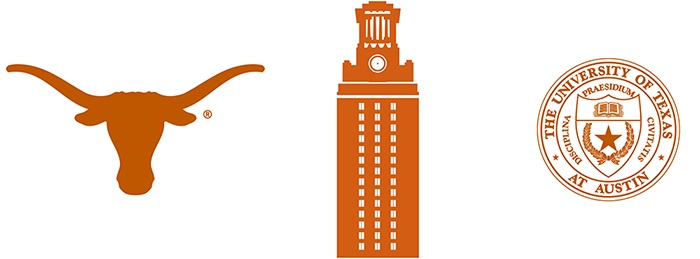



# **By John Chilton**

## Importing necessary libraries

# Data Preprocessing

In [ ]:
!pip install nb-black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Suppress any undesired warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation
import numpy as np  # Useful for numerical operations
import pandas as pd  # For data manipulation and analysis

# For splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

# Visualization libraries
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns  # Advanced plotting library
%matplotlib inline
sns.set_style("whitegrid")  # Setting a theme for seaborn plots

# Algorithms to build models
from sklearn.linear_model import LogisticRegression  # Logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier  # Decision tree algorithm
from sklearn import tree  # Allows for some tree operations, like visualization

# For tuning the parameters of the models
from sklearn.model_selection import GridSearchCV  # Helps perform grid search with cross-validation

# Metrics to evaluate models
import scipy.stats as stats  # Provides statistical functions
from sklearn.metrics import (
    f1_score,  # F1 score considers both precision and recall to compute the score
    accuracy_score,  # Percentage of correctly classified instances
    recall_score,  # Ability of the classifier to find all positive instances
    precision_score,  # Ability of the classifier to not label a negative sample as positive
    confusion_matrix,  # Matrix to understand true negatives, false positives, true positives, and false negatives
    roc_auc_score,  # Represents the area under the ROC curve
    precision_recall_curve,  # Precision-recall pairs for different probability thresholds
    roc_curve,  # Computes the receiver operating characteristic curve
    make_scorer,  # Factory function to generate scorer callable object
)

## Loading the dataset

In [ ]:
# The following code is specific to Google Colab and is used to mount Google Drive to the Colab environment.

from google.colab import drive  # Import the 'drive' module from 'google.colab' library

# This command prompts you to authorize Google Colab to access your Google Drive.
# After authorizing, your Google Drive will be mounted and you can access it as a local file system.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading a CSV file from the specified path on your Google Drive.
# 'pd.read_csv()' is a pandas function to read CSV files and convert them into DataFrame objects.
df = pd.read_csv('/content/drive/MyDrive/lab_mount/Loan_Modelling.csv')

# In this code:
# - '/content/drive/MyDrive/' is the default path for the mounted Google Drive in Colab.
# - 'lab_mount/Loan_Modelling.csv' is the path to your specific CSV file in your Google Drive.
# After executing, the 'df' variable will contain the data from 'Loan_Modelling.csv' as a DataFrame.

In [ ]:
# Displaying the first 10 rows of the DataFrame 'df'.
# 'df.head()' is a function provided by pandas that returns the top 'n' rows of a DataFrame.
# By default, 'n' is 5, but you can specify any number as an argument to see more or fewer rows.
# In this case, '10' is passed as an argument, so the first 10 rows of 'df' will be displayed.
df.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [ ]:
# Displaying the last 10 rows of the DataFrame 'df'.
# 'df.tail()' is a function provided by pandas that returns the bottom 'n' rows of a DataFrame.
# By default, 'n' is 5, but you can specify any number as an argument to see more or fewer rows.
# In this case, '10' is passed as an argument, so the last 10 rows of 'df' will be displayed.
df.tail(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
# Using the '.shape' attribute on the DataFrame 'df' to retrieve its dimensions.
# 'df.shape' returns a tuple representing the dimensionality of the DataFrame.
# The first element of the tuple gives the number of rows, and the second gives the number of columns.
print(df.shape)

(5000, 14)


In [ ]:
# Using the '.info()' method on the DataFrame 'df' to get a concise summary of the dataset.
# This method provides essential details about the dataset, such as:
# - The number of non-null values in each column
# - The data type of each column (e.g., int64, object, float64)
# - Memory usage of the DataFrame
# This overview can help identify columns with missing values and understand the kind of data present in each column.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Using the '.describe()' method on the DataFrame 'df' provides a statistical summary of the numerical columns.
# This includes:
# - Count: Number of non-null entries
# - Mean: Average value
# - Std: Standard deviation (spread from the mean)
# - Min: Minimum value
# - 25%: 25th percentile (value below which 25% of the data falls)
# - 50%: Median or 50th percentile
# - 75%: 75th percentile (value below which 75% of the data falls)
# - Max: Maximum value
# Transposing the result with '.T' makes the summary easier to read by displaying statistics as columns and features as rows.
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [ ]:
# The '.isnull()' method will return a DataFrame where each entry is either True (if the original value is missing/NaN) or False.
# Then, using the '.sum()' method on this result counts the number of True values for each column.
# Hence, the result gives the count of missing values for each column in the dataset 'df'.
missing_values = df.isnull().sum()

missing_values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# The '.duplicated()' method will return a Series of boolean values (True or False).
# A True value indicates that the row is a duplicate of a previous row in the dataframe.
# By summing up these values using '.sum()', you get the total number of duplicated rows in the dataframe.
number_of_duplicates = df.duplicated().sum()

number_of_duplicates

0

In [ ]:
# The '.mean()' method computes the mean value of each column.
# This is especially useful for columns with numerical data.
# For columns with non-numeric data types, this method will not compute a mean and they will be excluded from the result.
column_means = df.mean()

column_means

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIPCode               93169.257000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal_Loan             0.096000
Securities_Account        0.104400
CD_Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

In [ ]:
# The '.mode()' method computes the mode value of each column.
# The mode is the value that appears most frequently in a column.
# If a column has multiple modes (bimodal or multimodal), all of them will be returned.
column_modes = df.mode()

column_modes

ID   Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1  35.0        32.0    44.0  94720.0     1.0    0.3        1.0   
1        2   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
2        3   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
3        4   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
4        5   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
...    ...   ...         ...     ...      ...     ...    ...        ...   
4995  4996   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
4996  4997   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
4997  4998   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
4998  4999   NaN         NaN     NaN      NaN     NaN    NaN        NaN   
4999  5000   NaN         NaN     NaN      NaN     NaN    NaN        NaN   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0          0.0            0.0                 0.0         0.0     1.0   
1          NaN            NaN                 NaN         NaN     NaN   
2          NaN            NaN                 NaN         NaN     NaN   
3          NaN            NaN                 NaN         NaN     NaN   
4          NaN            NaN                 NaN         NaN     NaN   
...        ...            ...                 ...         ...     ...   
4995       NaN            NaN                 NaN         NaN     NaN   
4996       NaN            NaN                 NaN         NaN     NaN   
4997       NaN            NaN                 NaN         NaN     NaN   
4998       NaN            NaN                 NaN         NaN     NaN   
4999       NaN            NaN                 NaN         NaN     NaN   

      CreditCard  
0            0.0  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4995         NaN  
4996         NaN  
4997         NaN  
4998         NaN  
4999         NaN  

[5000 rows x 14 columns]

In [ ]:
# The '.std()' method computes the standard deviation of each column
# Standard deviation measures the amount of variation or dispersion from the mean (average) value.
column_std = df.std()

column_std

ID                    1443.520003
Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIPCode               1759.455086
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Personal_Loan            0.294621
Securities_Account       0.305809
CD_Account               0.238250
Online                   0.490589
CreditCard               0.455637
dtype: float64

In [ ]:
# The '.unique()' method extracts the unique values of the specified column
unique_ids = df['ID'].unique()

unique_ids

array([   1,    2,    3, ..., 4998, 4999, 5000])

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Backup the original DataFrame
df_backup = df.copy()

# Drop a column from the original DataFrame
df.drop('ID', axis=1, inplace=True)

In [ ]:
# Checking the columns.
print(df.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
# The code aims to rename the categorical variable levels in the 'Education' column of the dataframe 'df'
# Specifically, it renames:
# 1 to 'Undergraduate' - This typically represents individuals who have completed their bachelor's degree but haven't pursued any further education.
# 2 to 'Graduate' - This could mean individuals who have pursued a master's degree post their undergraduate studies.
# 3 to 'Professional' - This might represent individuals who have acquired professional degrees or certifications beyond a master's degree.

df["Education"].replace(1, "Undergraduate", inplace=True) # Replace all instances of 1 with 'Undergraduate'
df["Education"].replace(2, "Graduate", inplace=True)      # Replace all instances of 2 with 'Graduate'
df["Education"].replace(3, "Professional", inplace=True)  # Replace all instances of 3 with 'Professional'

In [ ]:
# The code aims to identify any negative values present in the 'Experience' column of the dataframe 'df'.
# Negative values in an 'Experience' column might be errors or outliers, as experience, in general, should be a non-negative quantity.
# By using the unique() method, the code will return distinct negative values (if any) in the 'Experience' column.

negative_experience_values = df[df["Experience"] < 0]["Experience"].unique()

In [ ]:
# The code aims to correct potentially erroneous data in the 'Experience' column of the dataframe 'df'.
# It is assumed that negative values for 'Experience' (-1, -2, -3) might be data entry errors.
# Thus, we replace these negative values with their absolute values to ensure all experience values are non-negative.

# Replacing -1 with 1 in the 'Experience' column
df["Experience"].replace(-1, 1, inplace=True)

# Replacing -2 with 2 in the 'Experience' column
df["Experience"].replace(-2, 2, inplace=True)

# Replacing -3 with 3 in the 'Experience' column
df["Experience"].replace(-3, 3, inplace=True)


In [ ]:
# Checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

In [ ]:
# Number of unique values for Zip Code
df["ZIPCode"] = df["ZIPCode"].astype(str)

# Print the number of unique values for the first two digits of ZIPCode
print(
    "Number of unique values if we take first two digits of ZIPCode:",
    df["ZIPCode"].str[0:2].nunique()
)

# Extract the first two digits of the ZIPCode
df["ZIPCode"] = df["ZIPCode"].str[0:2]

# Convert the ZIPCode column to a categorical data type
df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode: 7


In [ ]:
# List of categorical columns
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "CreditCard",
    "ZIPCode"
]

# Converting the data type of the listed columns to 'category'
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
# Checking the columns
print(df.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# Labeled boxplot Parameters
def labeled_barplot(data, feature, perc=False, n=None):
    """
    This function creates a bar plot for a given feature with labels displayed on top of each bar.

    Parameters:
    - data (pd.DataFrame): The main dataframe.
    - feature (str): The column name of the feature for which the bar plot is desired.
    - perc (bool, default=False): Whether to display the label in percentage or raw count.
    - n (int, default=None): Limit the plot to top 'n' categories (useful for features with many unique categories).

    Returns:
    None. The function outputs a plot.
    """

    # Calculate the total number of records for the feature
    total = len(data[feature])

    # Get the unique category count for the feature
    count = data[feature].nunique()

    # Adjust the plot size based on the unique category count or the given 'n'
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # Set rotation for the x-axis labels for better visibility
    plt.xticks(rotation=90, fontsize=15)

    # Draw the countplot/barplot using seaborn
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with the desired label (either percentage or raw count)
    for p in ax.patches:
        if perc:
            # If 'perc' is True, calculate the percentage and set it as label
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            # If 'perc' is False, use the raw count as label
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  # x-coordinate position for the label
        y = p.get_height()  # y-coordinate position for the label

        # Place the label on the bar
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

In [ ]:
print("Displaying the first few rows of the 'Personal_Loan' column in the dataframe:")
print(df['Personal_Loan'].head())

Displaying the first few rows of the 'Personal_Loan' column in the dataframe:
0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: category
Categories (2, int64): [0, 1]


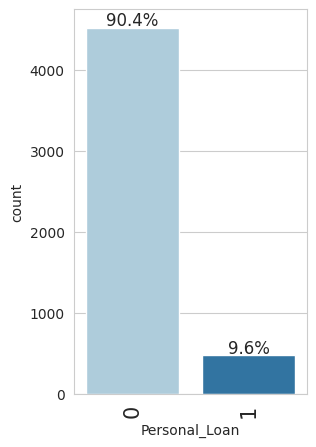

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    This function visualizes the distribution of categorical data using bar plots.
    For each bar, it displays the count or percentage of occurrences above it.

    Parameters:
    - data (pd.DataFrame): The dataframe containing the data.
    - feature (str): The column name of the categorical feature to be plotted.
    - perc (bool, default=False): If True, display percentages, otherwise raw count.
    - n (int, default=None): Number of top categories to display.

    Returns:
    - A bar plot with annotations.
    """
    total = len(data[feature])
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5))
    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()

# Displaying the distribution of the 'Personal_Loan' column in the dataset using the labeled_barplot function
labeled_barplot(df, 'Personal_Loan', perc=True);

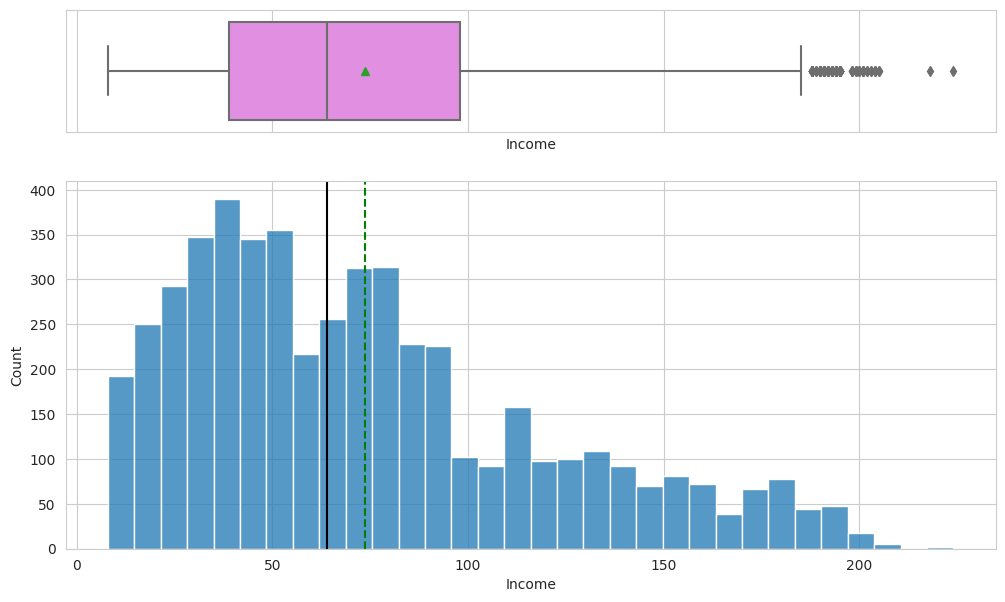

In [ ]:
# Histogram and boxplot combined parameters
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    This function plots a combined histogram and box plot for a given feature in the dataset.
    The histogram provides insights into the distribution, skewness, and kurtosis of the data,
    while the box plot helps in identifying outliers, and understanding the spread and quartiles.

    Parameters:
    - data: DataFrame containing the data
    - feature: Column name of the feature to be plotted
    - figsize: Figure size (default is (12,7))
    - kde: Boolean, whether to plot a gaussian kernel density estimate (default is False)
    - bins: Number of histogram bins to be used (default is None which uses Freedman-Diaconis rule)

    Returns:
    - A combined histogram and box plot
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    # Using the function to plot the "Income" feature
histogram_boxplot(df, "Income")

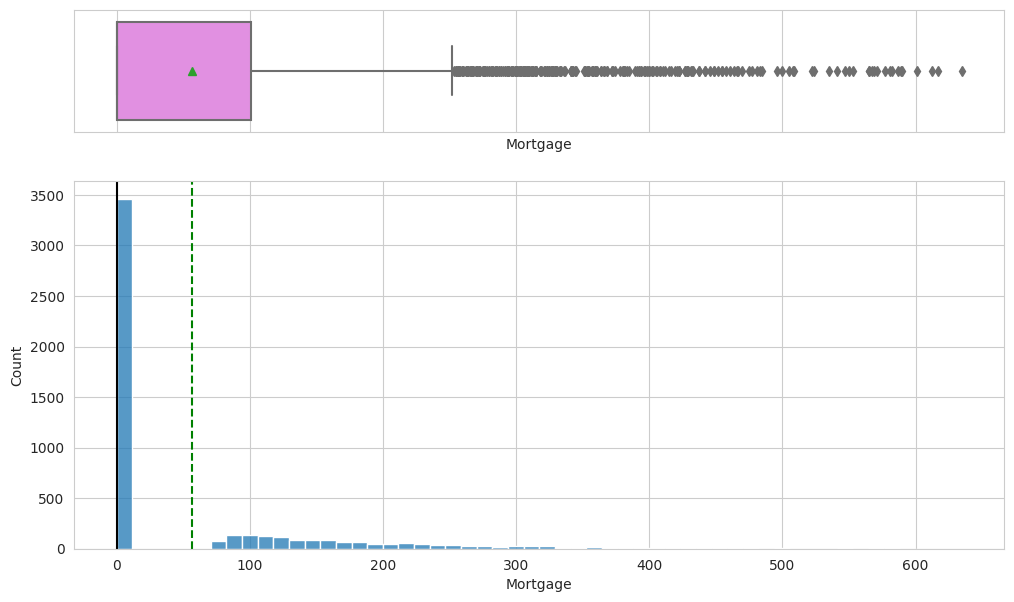

In [ ]:
# This function provides a combined view of the histogram and boxplot of a specified feature
# It gives a detailed view of the data distribution.
# The boxplot displays the summary statistics of the data,
# while the histogram gives insights into the data frequency and distribution.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

# Using the function to plot the "Mortgage" feature
histogram_boxplot(df, "Mortgage")


# Morgage has outliers that will have to be addressed along with other outliers in the data.

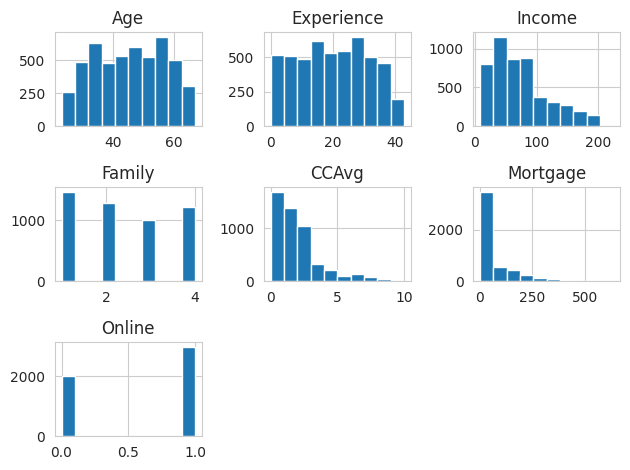

In [ ]:
# Hist plot of the data for visualization
df.hist()
plt.tight_layout();

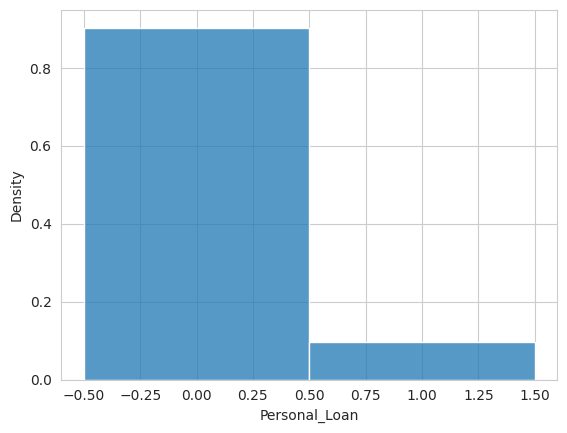

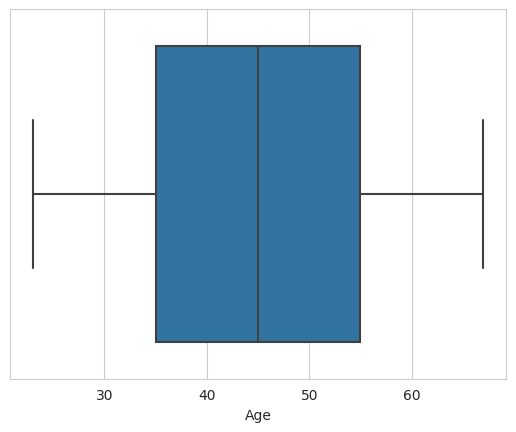

In [ ]:
# Hisplot and boxplot of Persoanl Loan and Age

sns.histplot(data=df,x='Personal_Loan',stat='density')
plt.show()
sns.boxplot(data=df,x='Age')
plt.show();

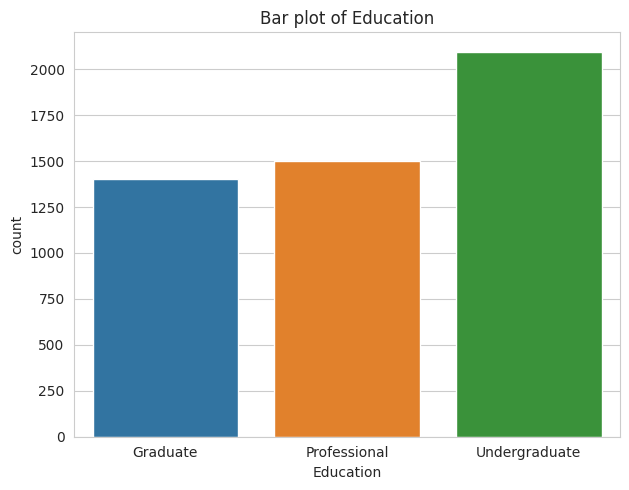

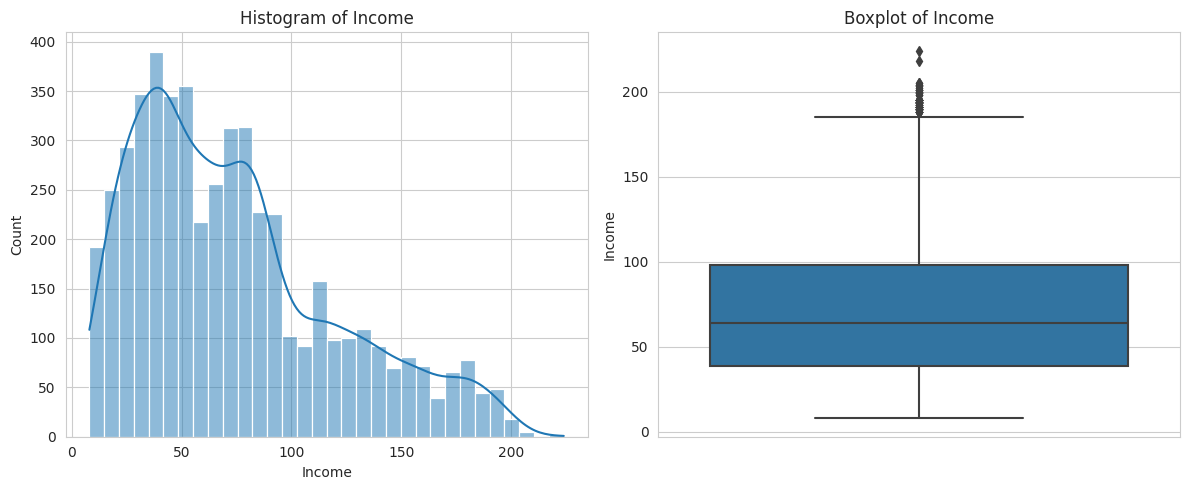

In [ ]:
# Barplot, Histogram , and Boxplot  of Education and Income

def histogram_boxplot(df, column_name, is_categorical=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # If the feature is categorical then draw a bar plot
    if is_categorical:
        sns.countplot(data=df, x=column_name, ax=axes[0])
        axes[0].set_title(f'Bar plot of {column_name}')
        axes[1].remove()  # removing the second plot as boxplot is not applicable for categorical data
    else:
        sns.histplot(data=df, x=column_name, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {column_name}')
        sns.boxplot(data=df, y=column_name, ax=axes[1])
        axes[1].set_title(f'Boxplot of {column_name}')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and 'Education' and 'Income' columns separately
# Assuming 'df' is your DataFrame
histogram_boxplot(df, 'Education', is_categorical=True)
histogram_boxplot(df, 'Income')


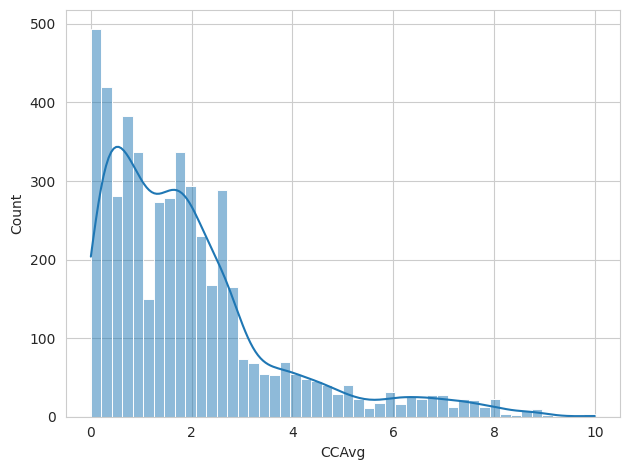

<Figure size 640x480 with 0 Axes>

In [ ]:
# Hisplot with KDE for CCAvg

sns.histplot(data=df, x='CCAvg', kde=True)
plt.tight_layout()
plt.show()
plt.tight_layout();

In [ ]:
# Checking the columns
print(df.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


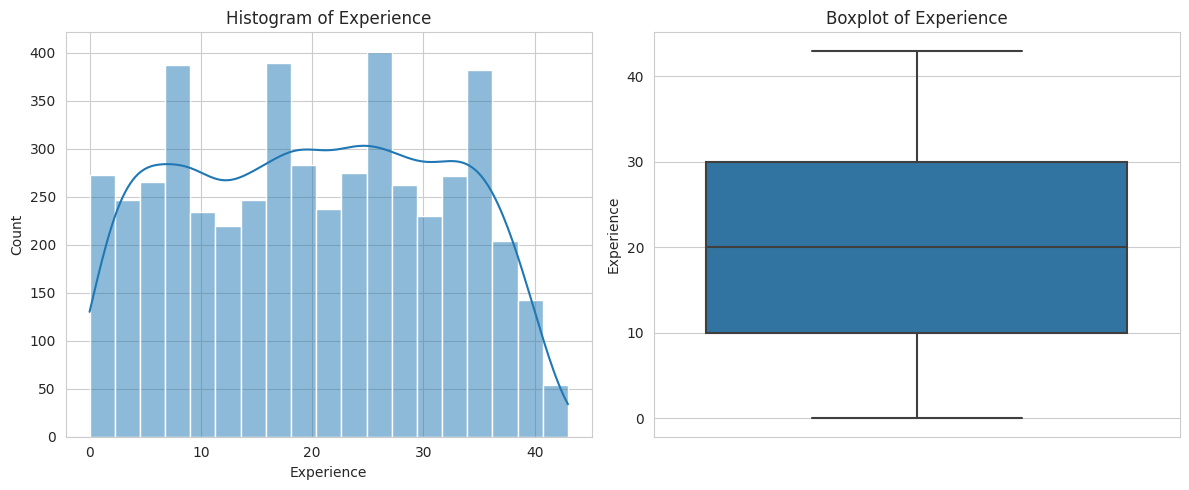

<Figure size 640x480 with 0 Axes>

In [ ]:
# Histgram and boxplot of Experience
def histogram_boxplot(dataframe, column_name):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot a histogram
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column_name}')


    # Plot a boxplot
    sns.boxplot(data=dataframe, y=column_name, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column_name}')

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and 'Experience' column
# Assuming 'df' is your DataFrame
histogram_boxplot(df, 'Experience')
plt.tight_layout();

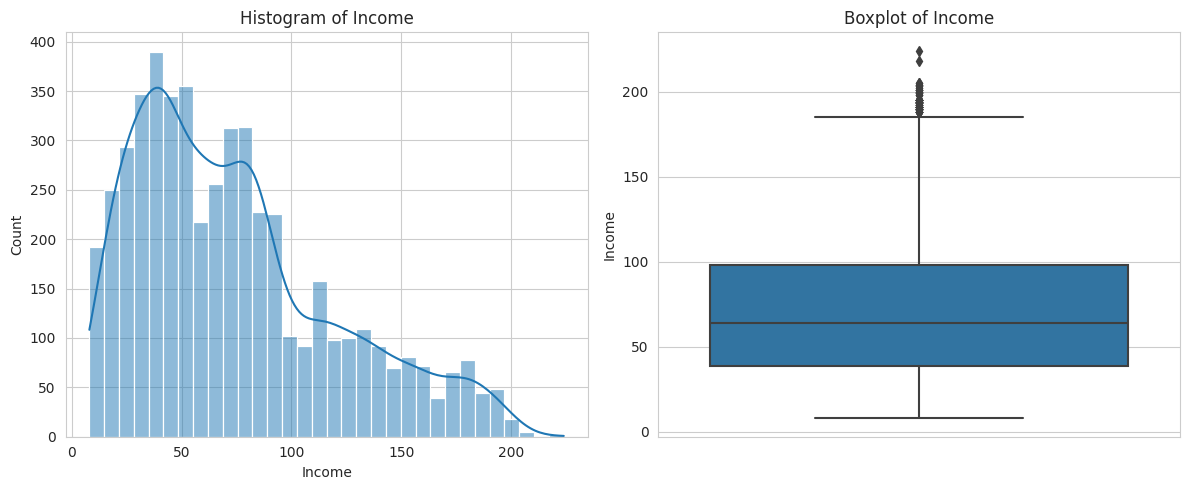

In [ ]:
# Histogram and boxplot of Income


def histogram_boxplot(dataframe, column_name):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot a histogram
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column_name}')

    # Plot a boxplot
    sns.boxplot(data=dataframe, y=column_name, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column_name}')

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and 'Income' column
# Assuming 'df' is your DataFrame
histogram_boxplot(df, 'Income');

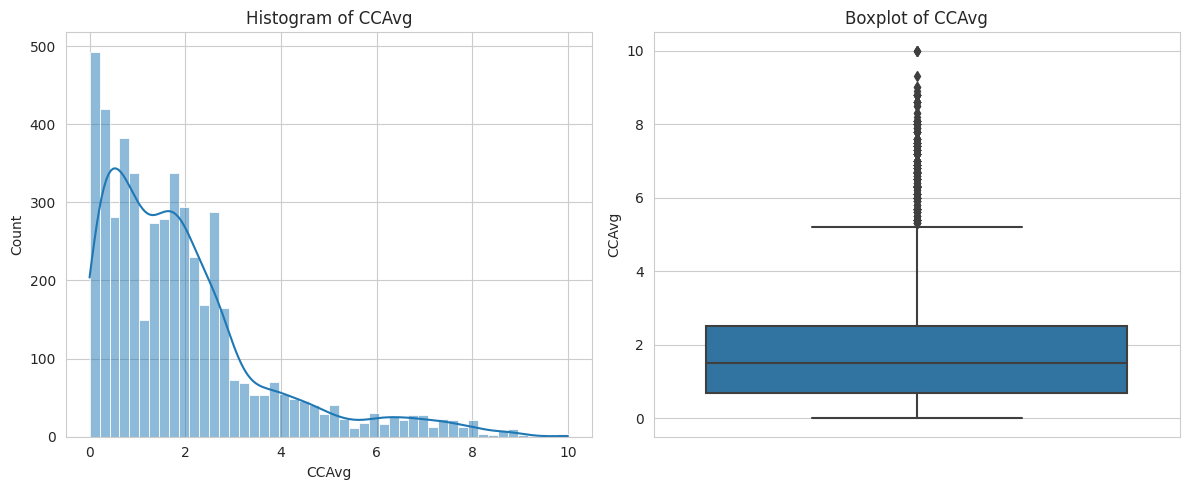

In [ ]:
# Histogram and boxplot of CCAvg
def histogram_boxplot(dataframe, column_name):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot a histogram
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column_name}')

    # Plot a boxplot
    sns.boxplot(data=dataframe, y=column_name, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column_name}')

    # Show the plots
    plt.tight_layout()
    plt.show()


# Call the function with your DataFrame and 'CCAvg' column
histogram_boxplot(df, 'CCAvg');

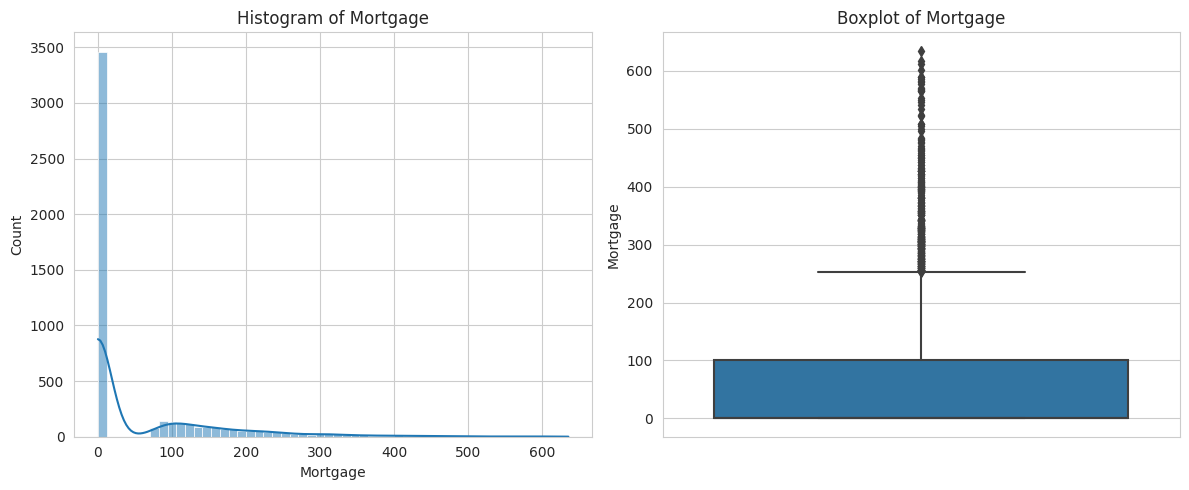

In [ ]:
# Histogram and boxplot of Mortgage
def histogram_boxplot(dataframe, column_name):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot a histogram
    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column_name}')

    # Plot a boxplot
    sns.boxplot(data=dataframe, y=column_name, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column_name}')

    # Show the plots
    plt.tight_layout()
    plt.show()


# Call the function with your DataFrame and 'Mortgage' column
histogram_boxplot(df, 'Mortgage')


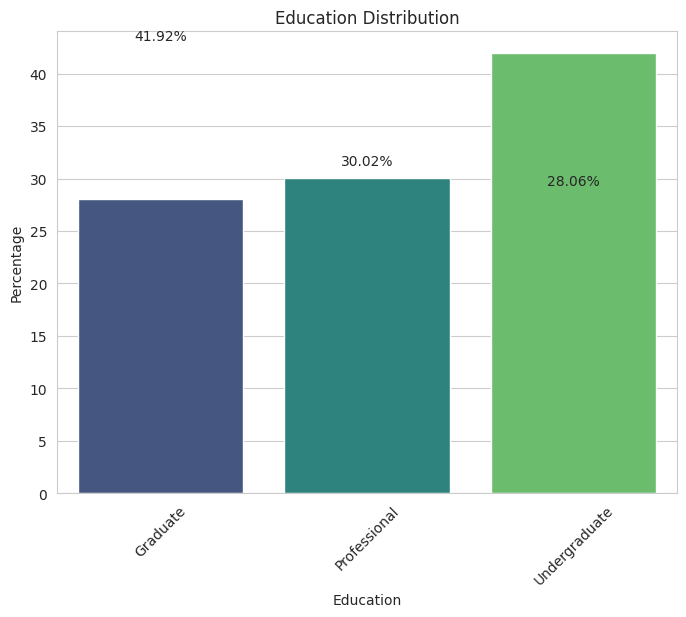

In [ ]:
# Education barplot distruibution breakdown with class identifiers
def labeled_barplot(dataframe, column_name, perc=True):
    # Calculate the value counts
    counts = df[column_name].value_counts()

    # Calculate percentages if perc is True
    if perc:
        total = len(df)
        percentages = (counts / total) * 100
    else:
        percentages = counts

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")
    plt.xlabel(column_name)
    plt.ylabel("Percentage" if perc else "Count")
    plt.title(f"{column_name} Distribution")

    # Annotate the bars with percentages
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.2f}%" if perc else v, ha='center', va='bottom')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()


# Call the function with your DataFrame and 'Education' column
# Assuming 'df' is your DataFrame
labeled_barplot(df, "Education", perc=True);

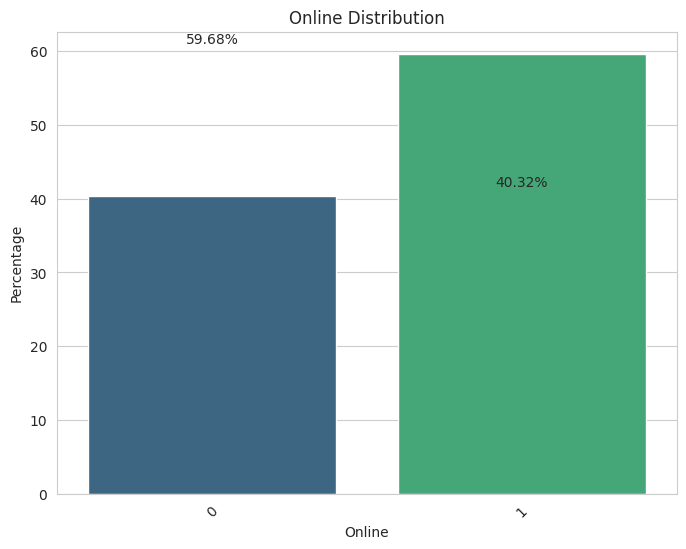

In [ ]:
# Barplot of Online Distribution
def labeled_barplot(dataframe, column_name, perc=True):
    # Calculate the value counts
    counts = df[column_name].value_counts()

    # Calculate percentages if perc is True
    if perc:
        total = len(df)
        percentages = (counts / total) * 100
    else:
        percentages = counts

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")
    plt.xlabel(column_name)
    plt.ylabel("Percentage" if perc else "Count")
    plt.title(f"{column_name} Distribution")

    # Annotate the bars with percentages
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.2f}%" if perc else v, ha='center', va='bottom')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()



# Call the function with your DataFrame and 'Online' column
# Assuming 'df' is your DataFrame
labeled_barplot(df, "Online", perc=True);

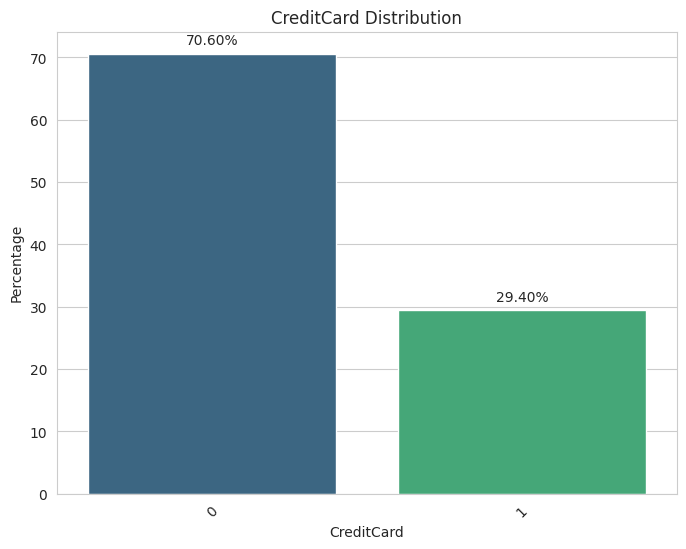

In [ ]:
# Barplot of Credit Card
def labeled_barplot(dataframe, column_name, perc=True):
    # Calculate the value counts
    counts = df[column_name].value_counts()

    # Calculate percentages if perc is True
    if perc:
        total = len(df)
        percentages = (counts / total) * 100
    else:
        percentages = counts

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")
    plt.xlabel(column_name)
    plt.ylabel("Percentage" if perc else "Count")
    plt.title(f"{column_name} Distribution")

    # Annotate the bars with percentages
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.2f}%" if perc else v, ha='center', va='bottom')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()


# Call the function with your DataFrame and 'CreditCard' column
# Assuming 'df' is your DataFrame
labeled_barplot(df, "CreditCard", perc=True);

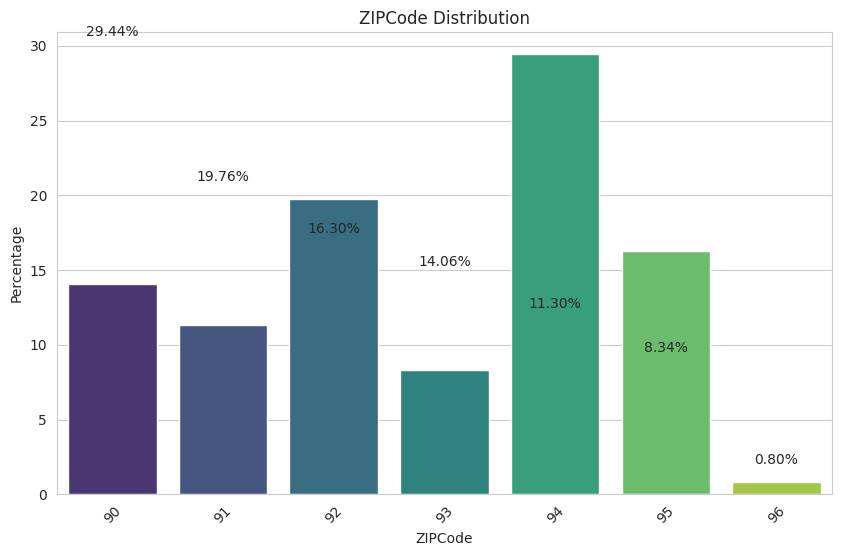

In [ ]:
# Barplot of Zip Code
def labeled_barplot(dataframe, column_name, perc=True):
    # Calculate the value counts
    counts = df[column_name].value_counts()

    # Calculate percentages if perc is True
    if perc:
        total = len(df)
        percentages = (counts / total) * 100
    else:
        percentages = counts

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=percentages.index, y=percentages.values, palette="viridis")
    plt.xlabel(column_name)
    plt.ylabel("Percentage" if perc else "Count")
    plt.title(f"{column_name} Distribution")

    # Annotate the bars with percentages
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.2f}%" if perc else v, ha='center', va='bottom')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()


# Call the function with your DataFrame and 'ZIPCode' column
# Assuming 'df' is your DataFrame
labeled_barplot(df, "ZIPCode", perc=True);

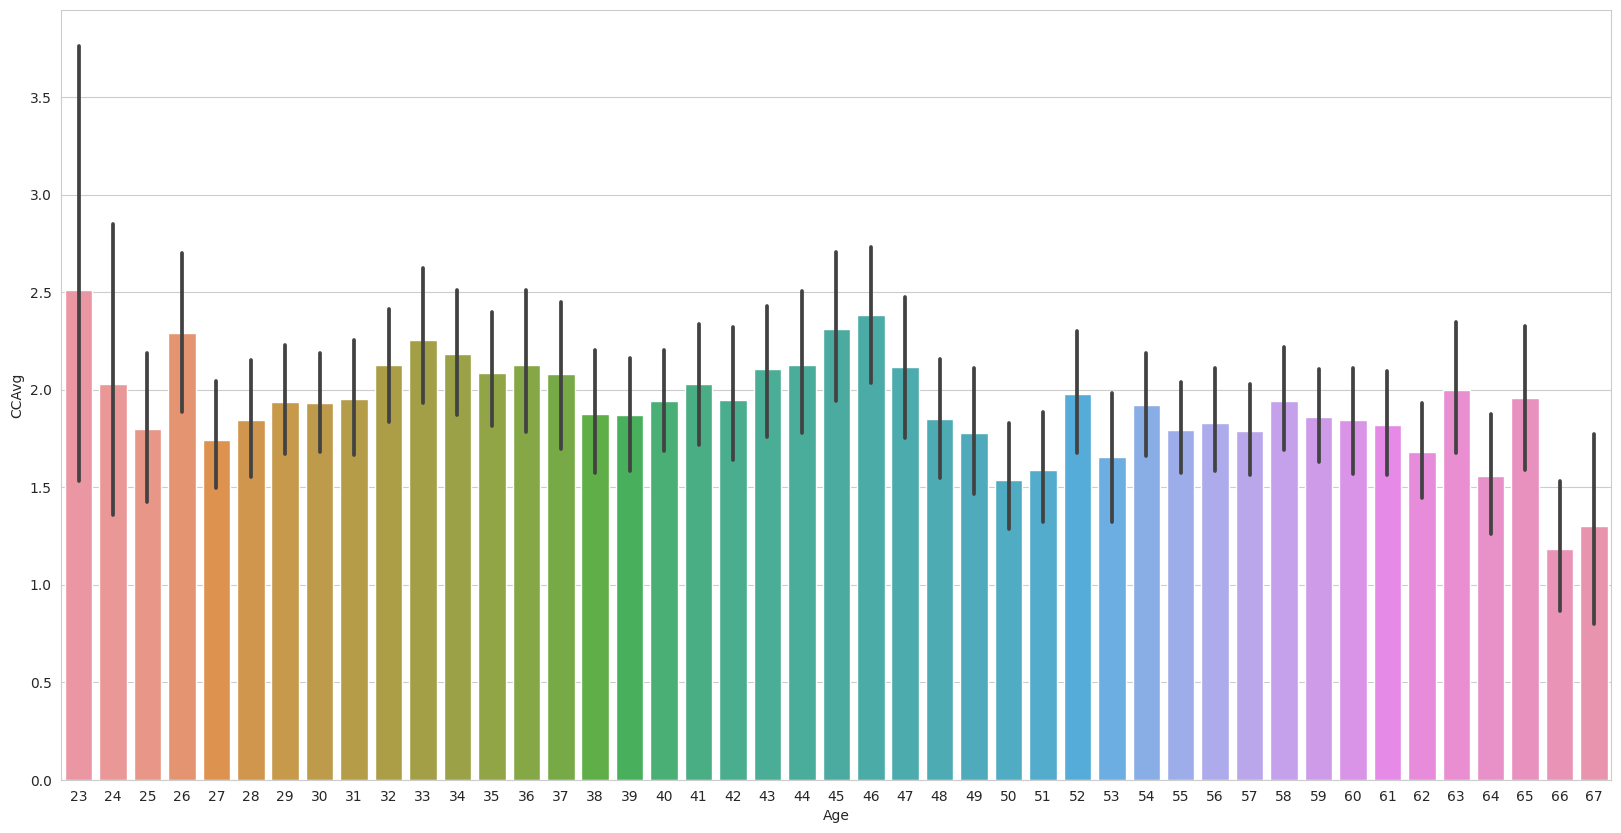

In [ ]:
# Barplot of Age vs. Credit Card Average

# Set the figure size
plt.figure(figsize=(20, 10))  # Adjust the values as desired

# Create the bar plot
sns.barplot(data=df, x='Age', y='CCAvg')

# Show the plot
plt.show();

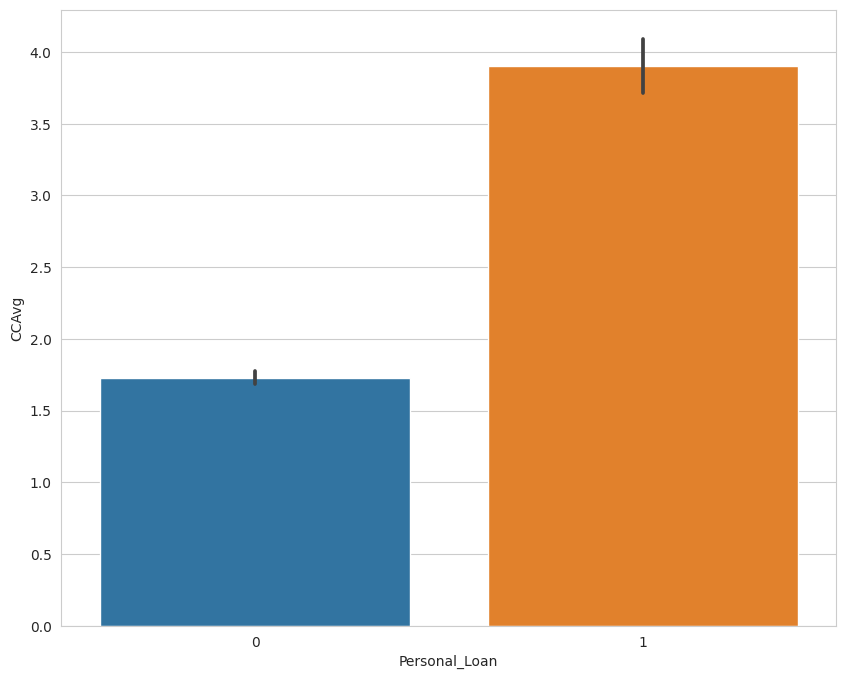

In [ ]:
# Barplot of Persoanl Loan and Credit Card Average

# Set the figure size
plt.figure(figsize=(10,8))  # Adjust the values as desired

# Create the bar plot
sns.barplot(data=df, x='Personal_Loan', y='CCAvg')

# Show the plot
plt.show();

<Figure size 1000x600 with 0 Axes>

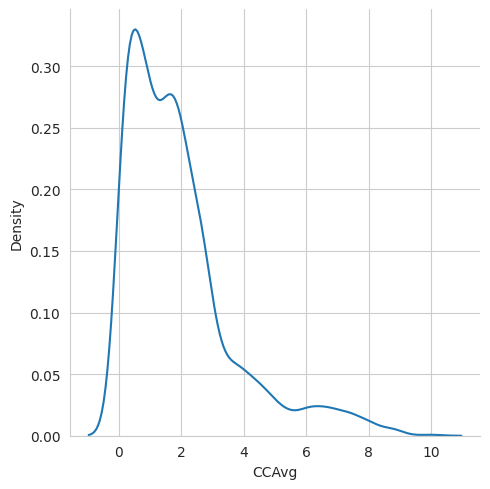

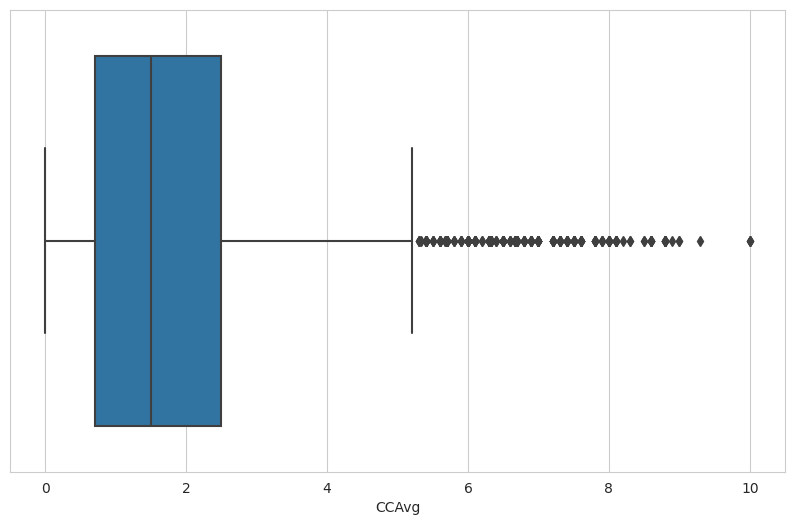

In [ ]:
# Displot and Boxplot of Credit Card Average

# KDE Plot for 'CCAvg'
plt.figure(figsize=(10,6))  # Adjust the figure size as desired
sns.displot(data=df, x='CCAvg', kind='kde')
plt.show()

# Box Plot for 'CCAvg'
plt.figure(figsize=(10,6))  # Adjust the figure size as desired
sns.boxplot(data=df, x='CCAvg')
plt.show();

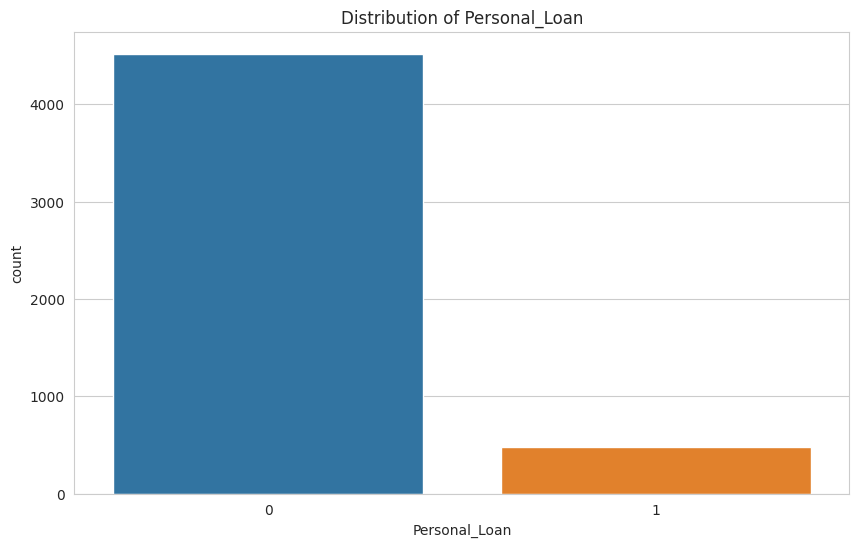

In [ ]:
# Bar plot for 'Personal_Loan'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Personal_Loan')
plt.title('Distribution of Personal_Loan')
plt.show();

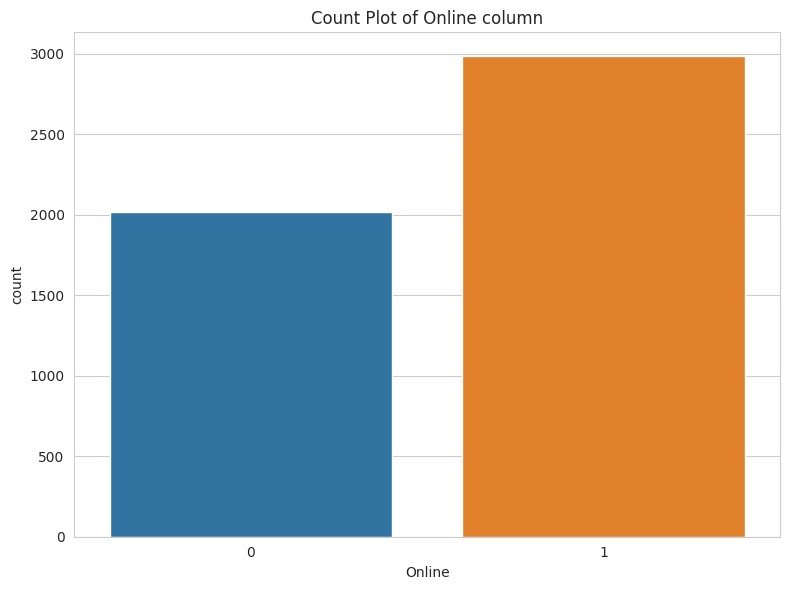

In [ ]:
# Create count plot for Online column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Online')
plt.title('Count Plot of Online column')
plt.tight_layout()
plt.show();

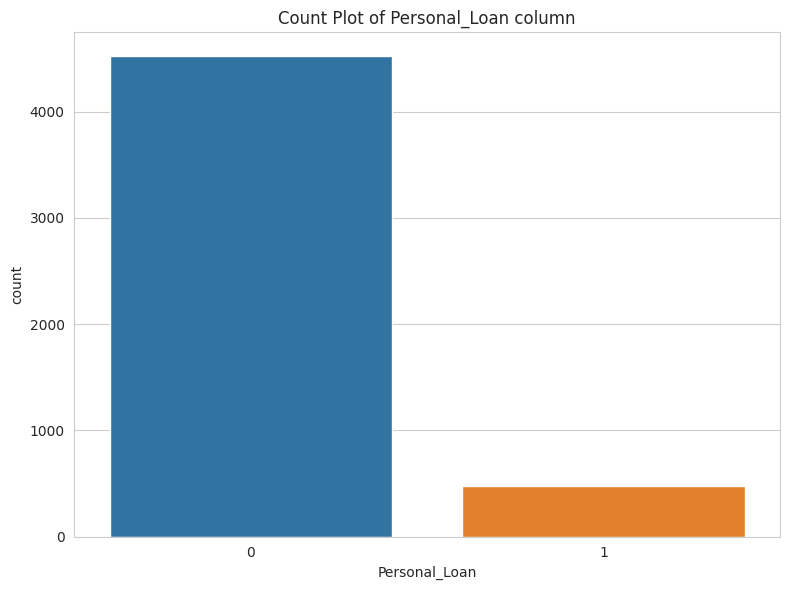

In [ ]:
# Create count plot for Personal loan column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Personal_Loan')
plt.title('Count Plot of Personal_Loan column')
plt.tight_layout()
plt.show();

### Bivariate Analysis

In [ ]:
# Checking the columns.
print(df.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    """
    Plots the distribution of a predictor variable with respect to the target variable.

    data: DataFrame
        The dataset containing the predictor and target variables.
    predictor: str
        The name of the predictor variable column in the dataset.
    target: str
        The name of the target variable column in the dataset.
    """

    # Initializing a 2x2 subplot layout with a specified size
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Extracting unique values of the target variable (assumes binary target)
    target_uniq = data[target].unique()

    # Plotting the distribution of the predictor for the first unique target value
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    # Plotting the distribution of the predictor for the second unique target value
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Plotting a box plot of the predictor variable with respect to the target
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Plotting a box plot of the predictor variable without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    # Adjusting the layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

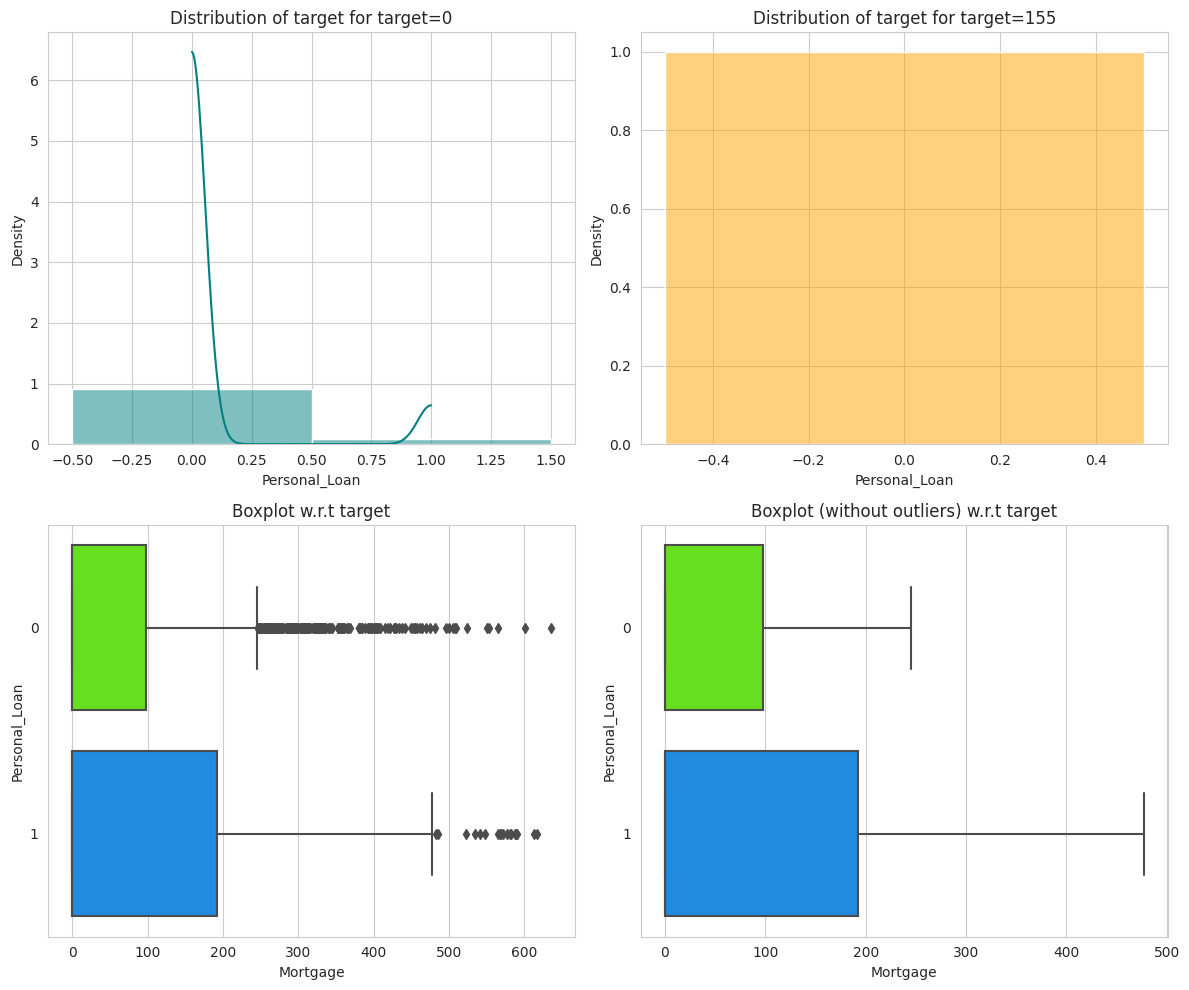

In [ ]:
# Distribution plot of personal loan and mortgage.
distribution_plot_wrt_target(df, "Personal_Loan", "Mortgage")

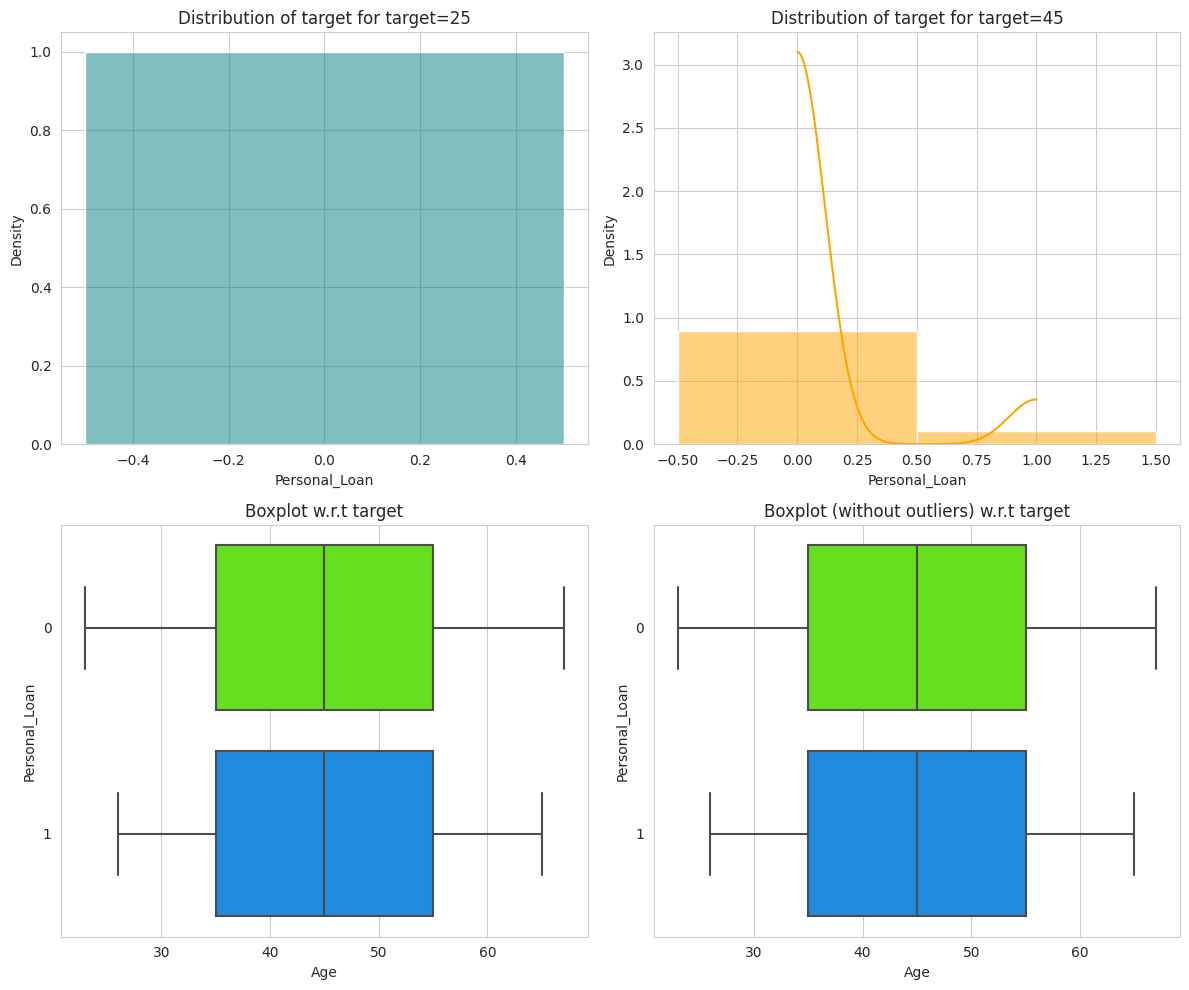

In [ ]:
# Distribution plot of personal loan and age.
distribution_plot_wrt_target(df, "Personal_Loan", "Age")

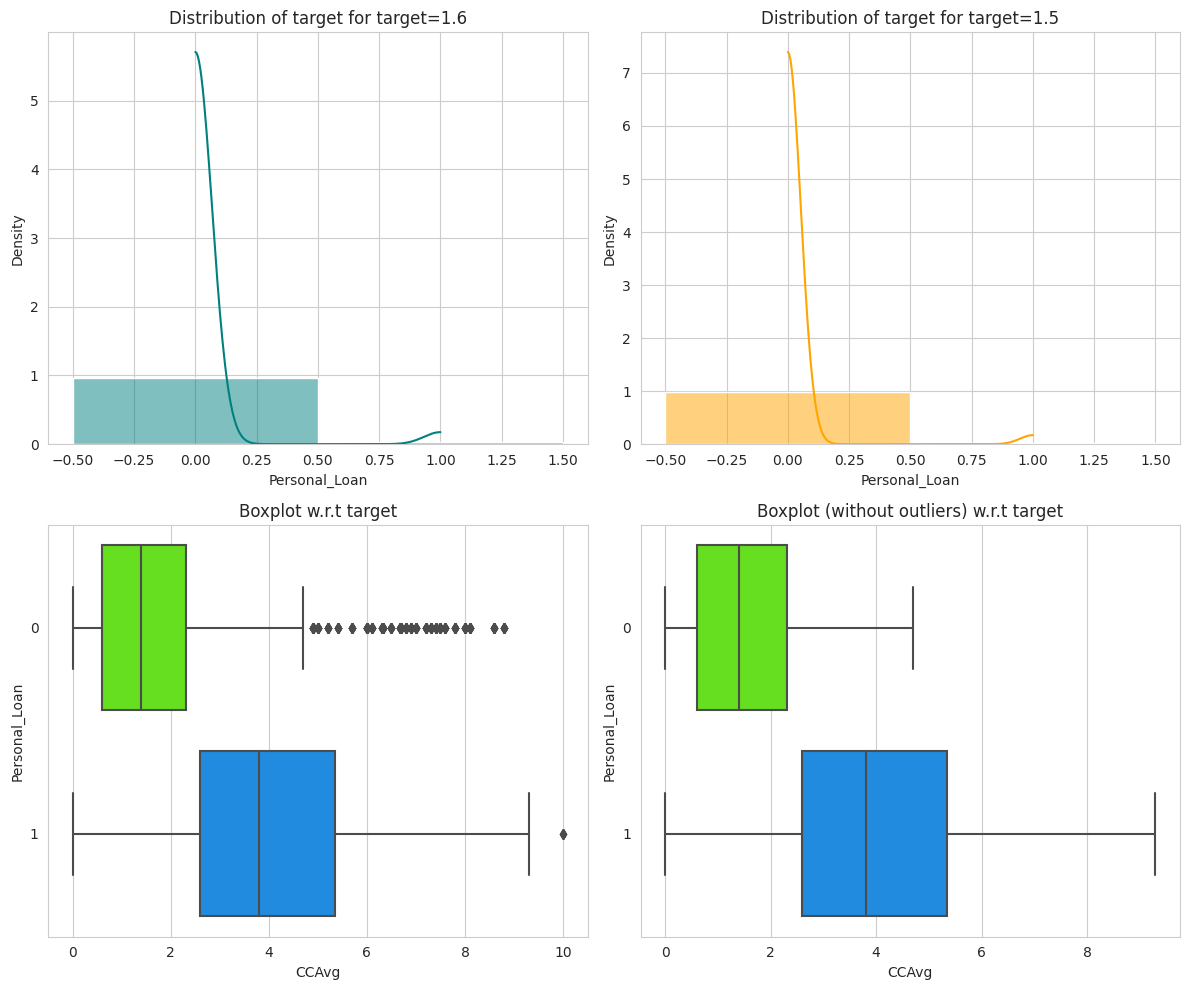

In [ ]:
# Distribution plot of persoanl loan and CCAvg.
distribution_plot_wrt_target(df, "Personal_Loan", "CCAvg")

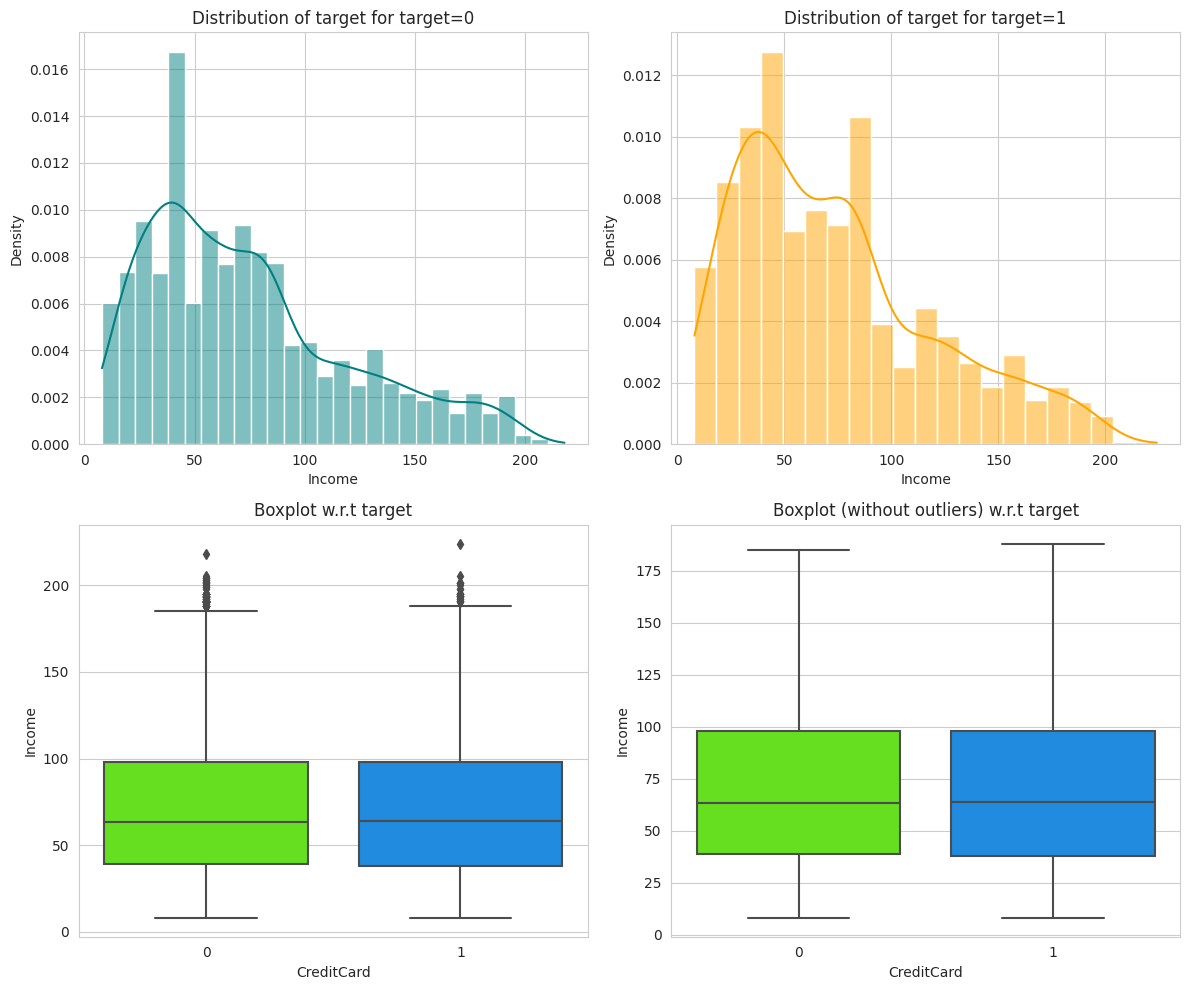

In [ ]:
# Distribution plot of income and credit card.
distribution_plot_wrt_target(df, "Income", "CreditCard")

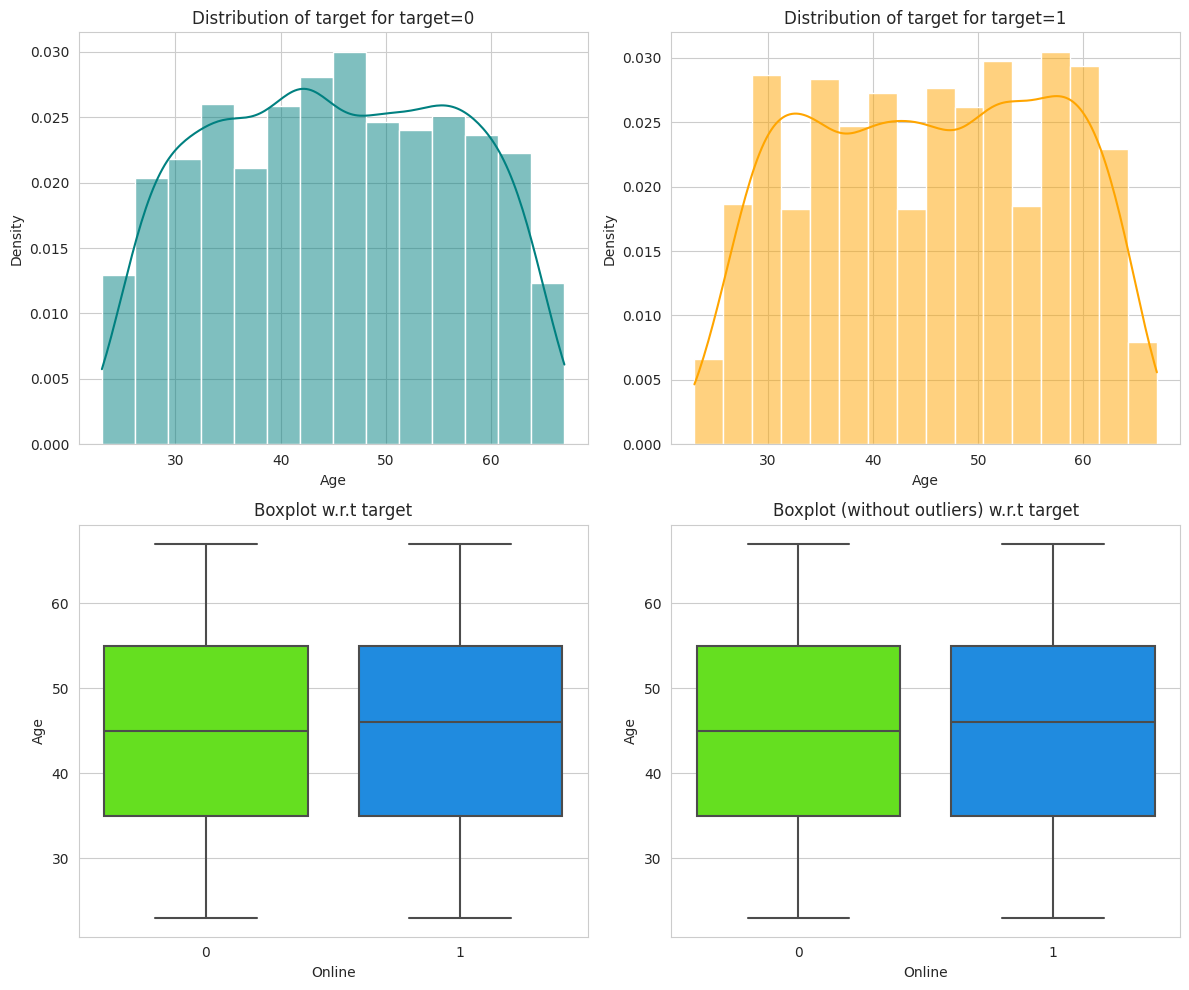

In [ ]:
# Distribution plot of age and online.
distribution_plot_wrt_target(df, "Age", "Online")

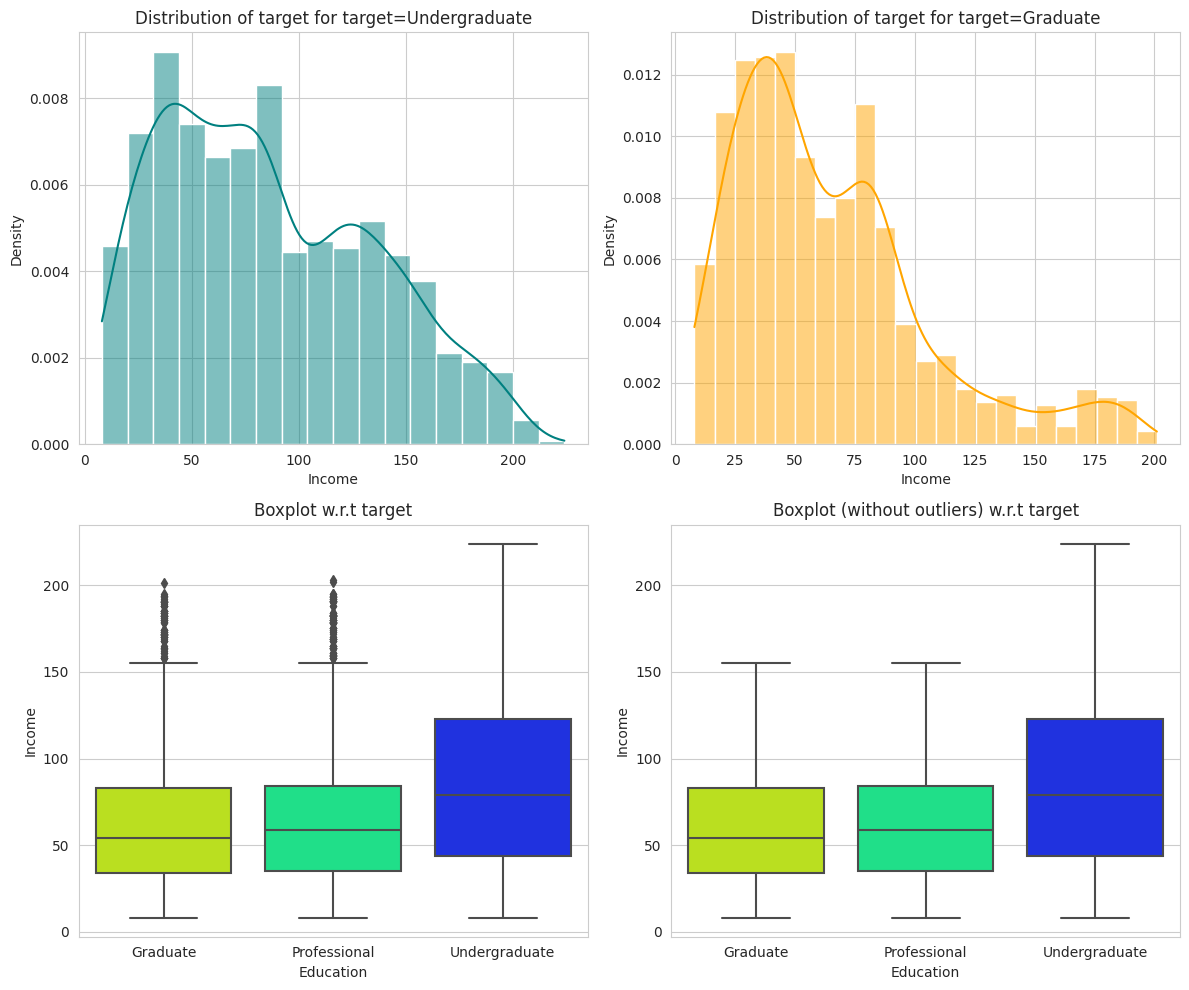

In [ ]:
# Distribution plot of income and education.
distribution_plot_wrt_target(df, "Income", "Education")

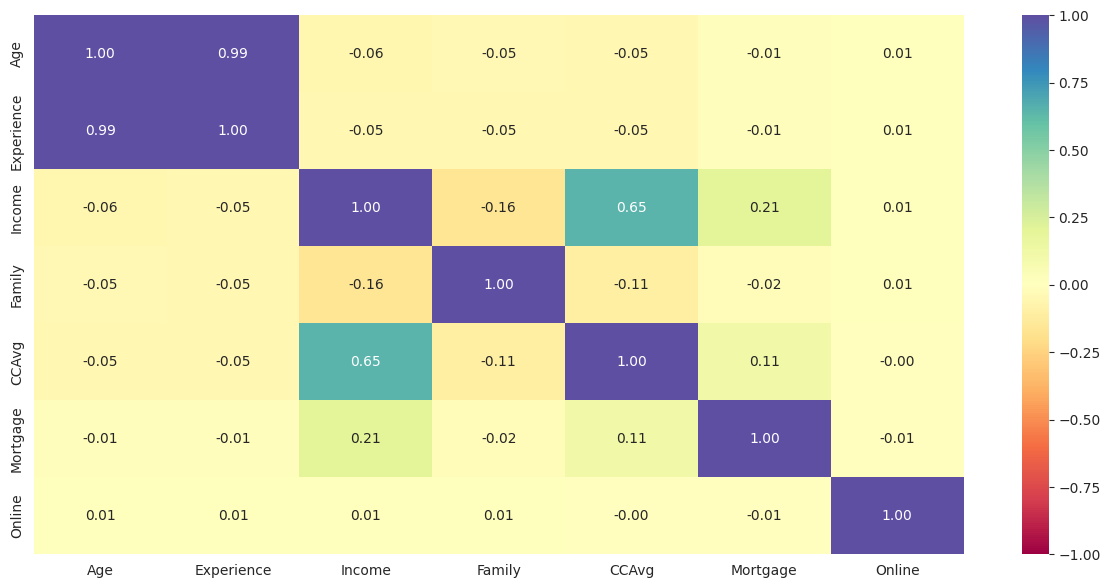

<Figure size 640x480 with 0 Axes>

In [ ]:
# Heatmap of the data
# Setting the figure size for the upcoming plot
plt.figure(figsize=(15, 7))

# Creating a heatmap of the correlation matrix
# - `df.corr()` computes the pairwise correlation of columns
# - `annot=True` adds annotations with the correlation coefficients
# - `vmin` and `vmax` set the color scale limits for the heatmap
# - `fmt=".2f"` formats the annotations to two decimal places
# - `cmap="Spectral"` sets the color palette
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Displaying the heatmap
plt.show()

# Adjusting the layout to ensure that everything fits without overlapping
plt.tight_layout();

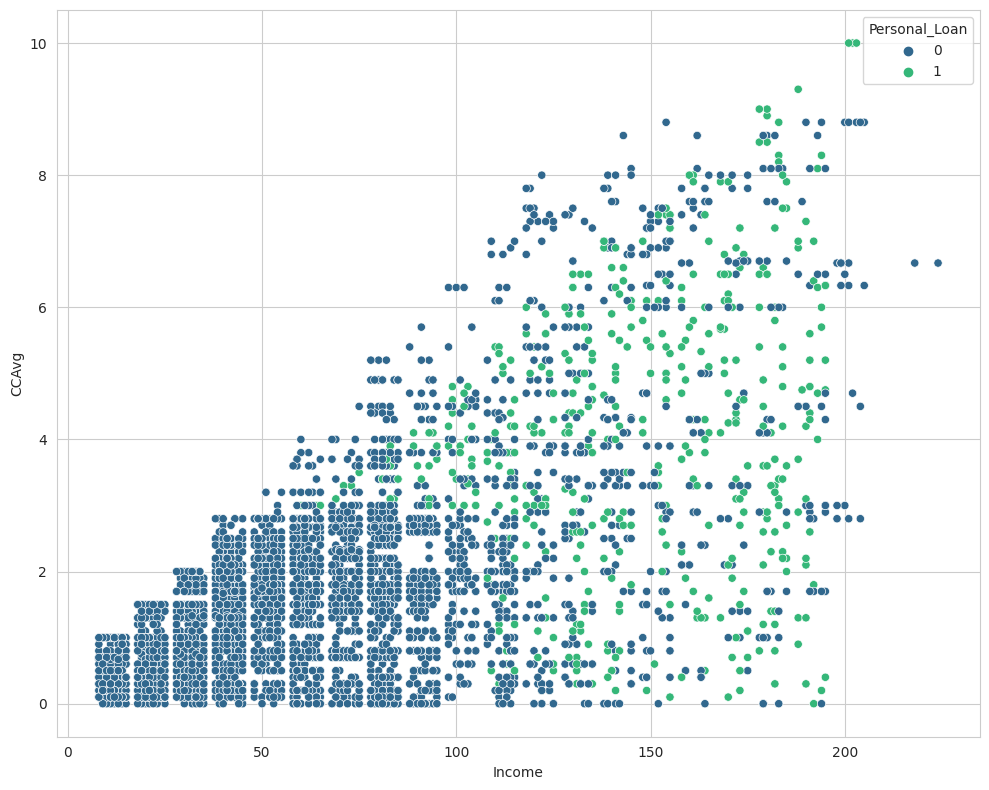

In [ ]:
# Scatterplot of income, ccavg, and personal loan.
# Optionally set figure size if you want
plt.figure(figsize=(10, 8))  # Adjust the values (10, 8) as needed

# Scatterplot with color based on 'Education'
sns.scatterplot(data=df, x='Income', y='CCAvg', hue='Personal_Loan', palette='viridis')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show();

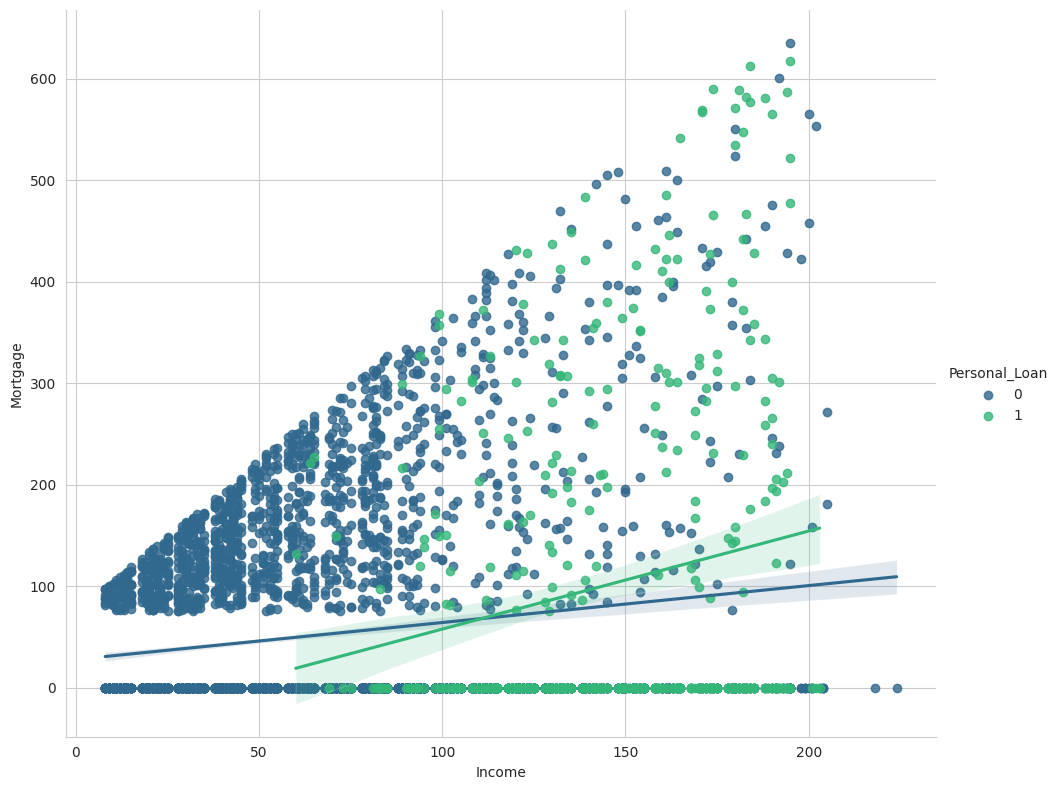

In [ ]:
# Lmpot of income, mortagage, and personal loan.
# Create lmplot with optional size adjustments and color based on 'Personal_Loan'
sns.lmplot(data=df, x='Income', y='Mortgage', hue='Personal_Loan', height=8, aspect=1.2, palette='viridis')

# Show the plot
plt.show();

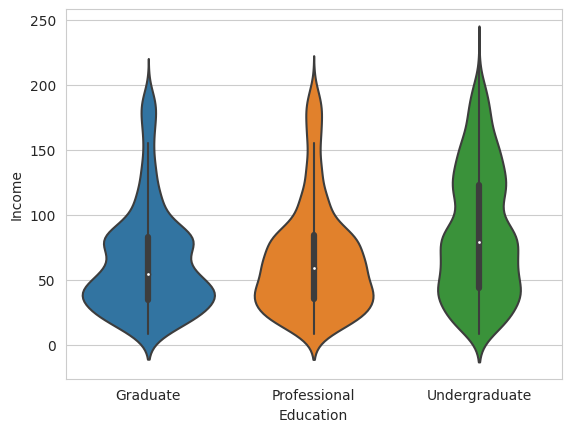

In [ ]:
# Violinplot of Education vs. Income
# Create the violin plot
sns.violinplot(data=df, x='Education', y='Income')

# Show the plot
plt.show();

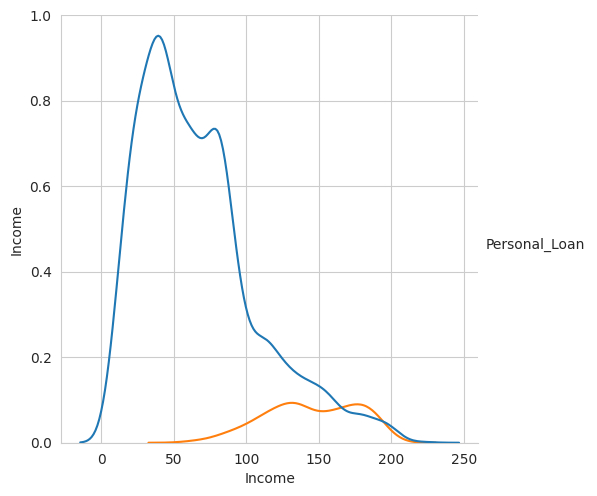

In [ ]:
# PairGrid of Personal loan, Income. Personal lona is in hue.
# Create a PairGrid
g = sns.PairGrid(df[['Personal_Loan', 'Income']], hue='Personal_Loan', height=5)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)

# Add a legend
g.add_legend()

plt.show()

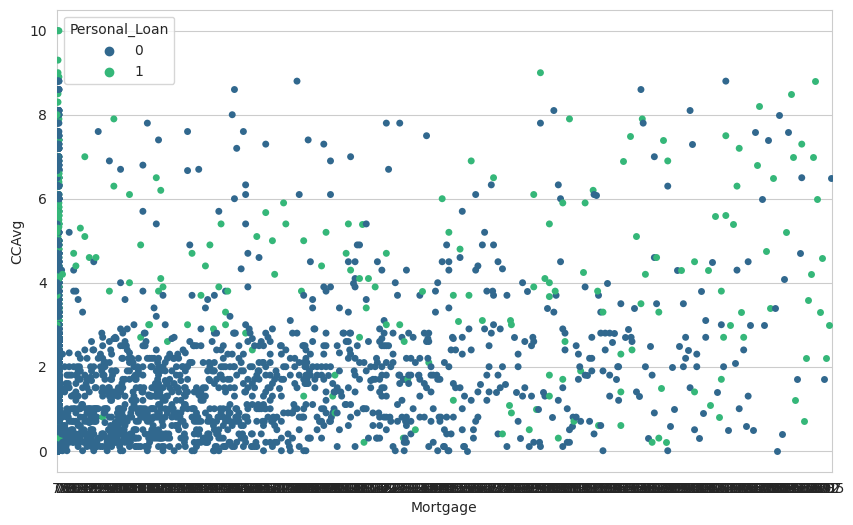

In [ ]:
# Swarmplot of education, ccavg and personal loan.

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the values (10, 6) as desired

# Create the swarm plot with color based on 'Personal_Loan'
sns.swarmplot(data=df, x='Mortgage', y='CCAvg', hue='Personal_Loan', palette='viridis')

# Show the plot
plt.show();

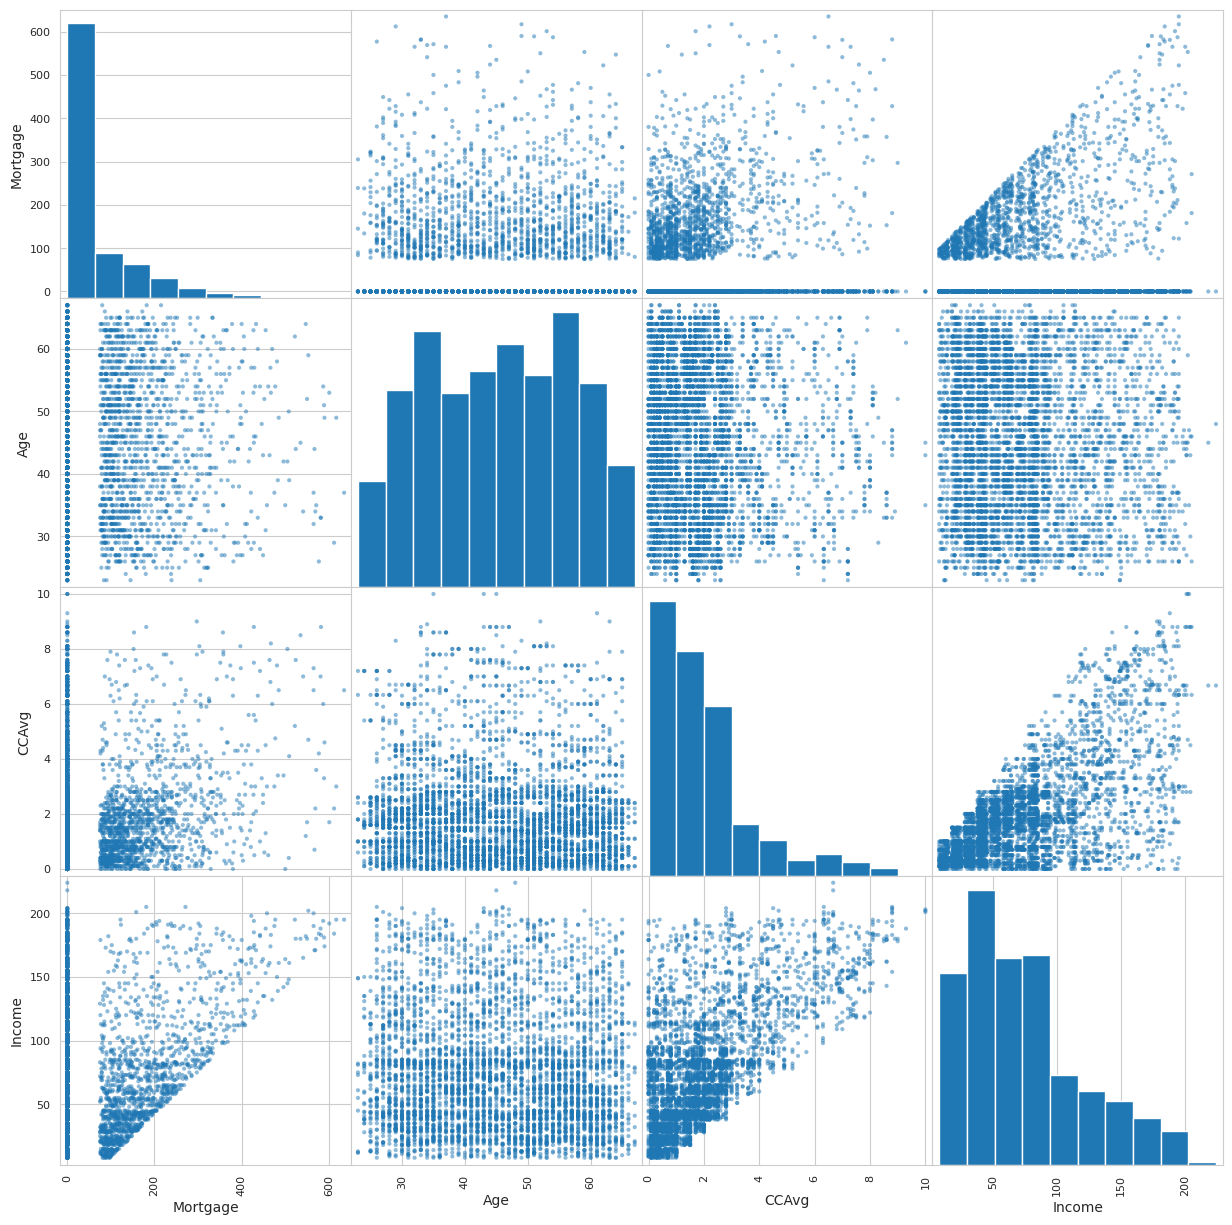

In [ ]:
from pandas.plotting import scatter_matrix

# List of attributes you want to view pairwise relationships for
attributes = ["Mortgage", "Age", "CCAvg", "Income", "Education"]

# Using the scatter_matrix function to plot pairwise relationships
# The figsize parameter allows us to specify the size of the figure. You can adjust (15, 15) as needed.
scatter_matrix(df[attributes], figsize=(15, 15))

# Show the plot
plt.show();

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Dropping the zip code column.
df.drop('ZIPCode', axis=1, inplace=True)

In [ ]:
# Printing to check the columns.
print(df.head())

   Age  Experience  Income  Family  CCAvg      Education  Mortgage  \
0   25           1      49       4    1.6  Undergraduate         0   
1   45          19      34       3    1.5  Undergraduate         0   
2   39          15      11       1    1.0  Undergraduate         0   
3   35           9     100       1    2.7       Graduate         0   
4   35           8      45       4    1.0       Graduate         0   

  Personal_Loan Securities_Account CD_Account  Online CreditCard  
0             0                  1          0       0          0  
1             0                  1          0       0          0  
2             0                  0          0       0          0  
3             0                  0          0       0          0  
4             0                  0          0       0          1  


In [ ]:
# Identify columns with missing values
cols_with_missing = df.columns[df.isnull().any()]

# Impute missing values with median for each column
for col in cols_with_missing:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Check if any columns still have missing values
print(df.isnull().sum())

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
Q1 = df.quantile(0.25)  # 25th percentile
Q3 = df.quantile(0.75)  # 75th percentile

IQR = Q3 - Q1               # Inter Quantile Range (75th percentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower bound for outliers
upper = Q3 + 1.5 * IQR  # Finding upper bound for outliers


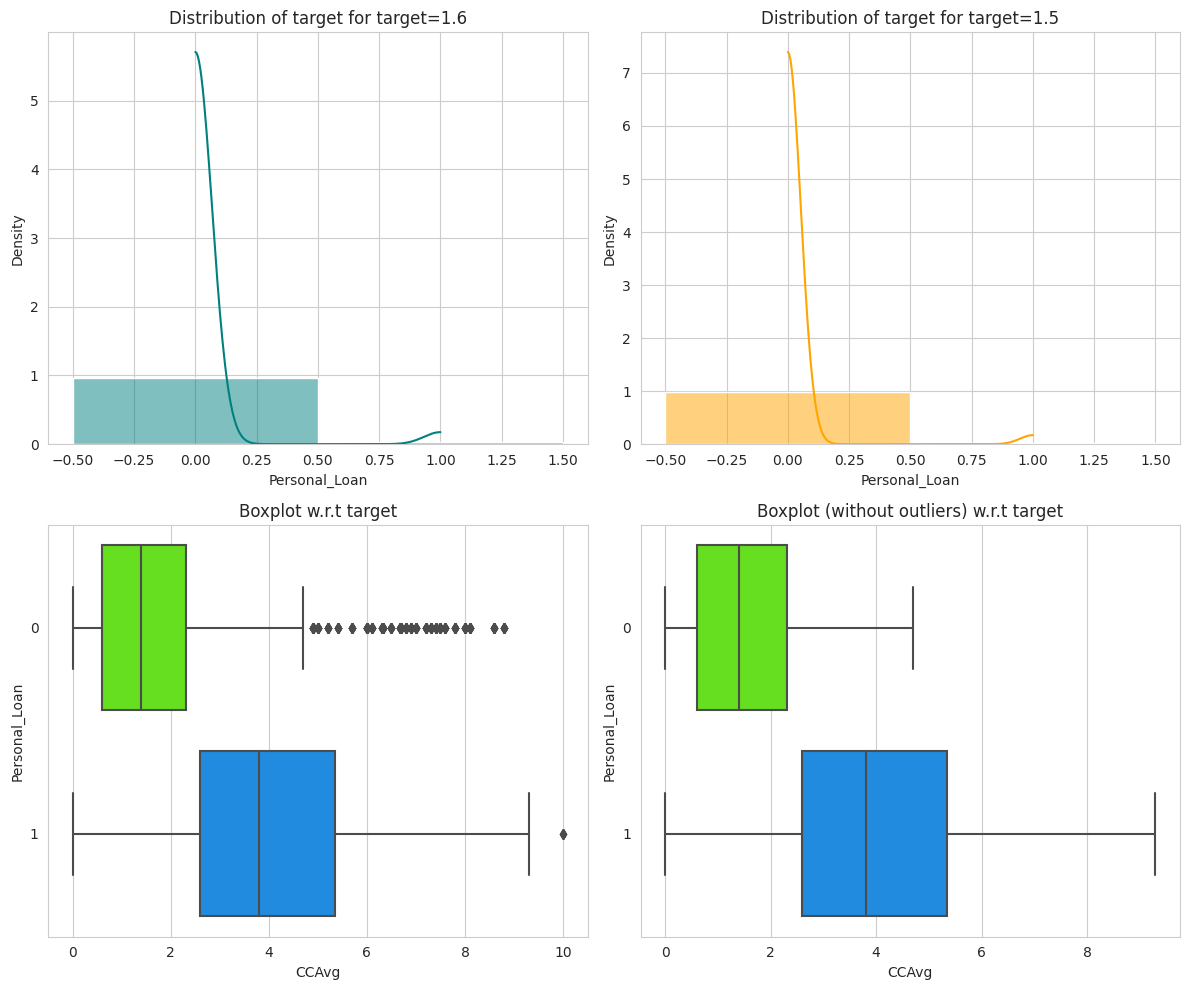

In [ ]:
# Distribution plot of persoanl loan and CCAvg.
distribution_plot_wrt_target(df, "Personal_Loan", "CCAvg")

In [ ]:
#  calculate the percentage of values that are outside of a given range, defined by lower and upper.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
Online        0.00
dtype: float64

In [ ]:
# Print out of the columns for view
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(6)
memory usage: 298.6 KB


- The objective is to predict whether a liability customer will buy personal loans.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then

### Data Preparation for Modeling

In [ ]:
# Splitting the data into test and train.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
# Separate independent and dependent variable
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]

In [ ]:
# Check the column names in your DataFrame
print(X.columns)

# Ensure that the column names are correct and case-sensitive
# If they are correct, you can proceed with one-hot encoding
X = pd.get_dummies(X, columns=["CreditCard", "Education"], drop_first=True)

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
# Checking the columns
print(X.columns)

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard_1', 'Education_Professional',
       'Education_Undergraduate'],
      dtype='object')


In [ ]:
print("Shape of Training set : ", X_train.shape)       # Shape of train data
print("Shape of test set : ", X_test.shape)            # Shape of test data
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))            # Value counts of y train data
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))             # Value counts of y test data

Shape of Training set :  (4000, 11)
Shape of test set :  (1000, 11)
Percentage of classes in training set:
0    0.905
1    0.095
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.9
1    0.1
Name: Personal_Loan, dtype: float64


### Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Sklearn to plot the cunfusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  ## Fit the decision tree on train data

DecisionTreeClassifier(random_state=1)

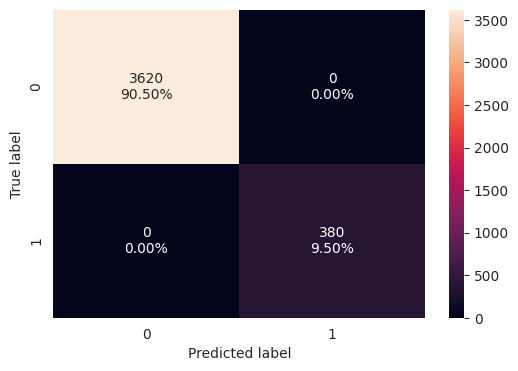

In [ ]:
# Viewing the matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Predictions readout
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Visualizing the Decision Tree

In [ ]:
# Printing of feature names
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard_1', 'Education_Professional', 'Education_Undergraduate']


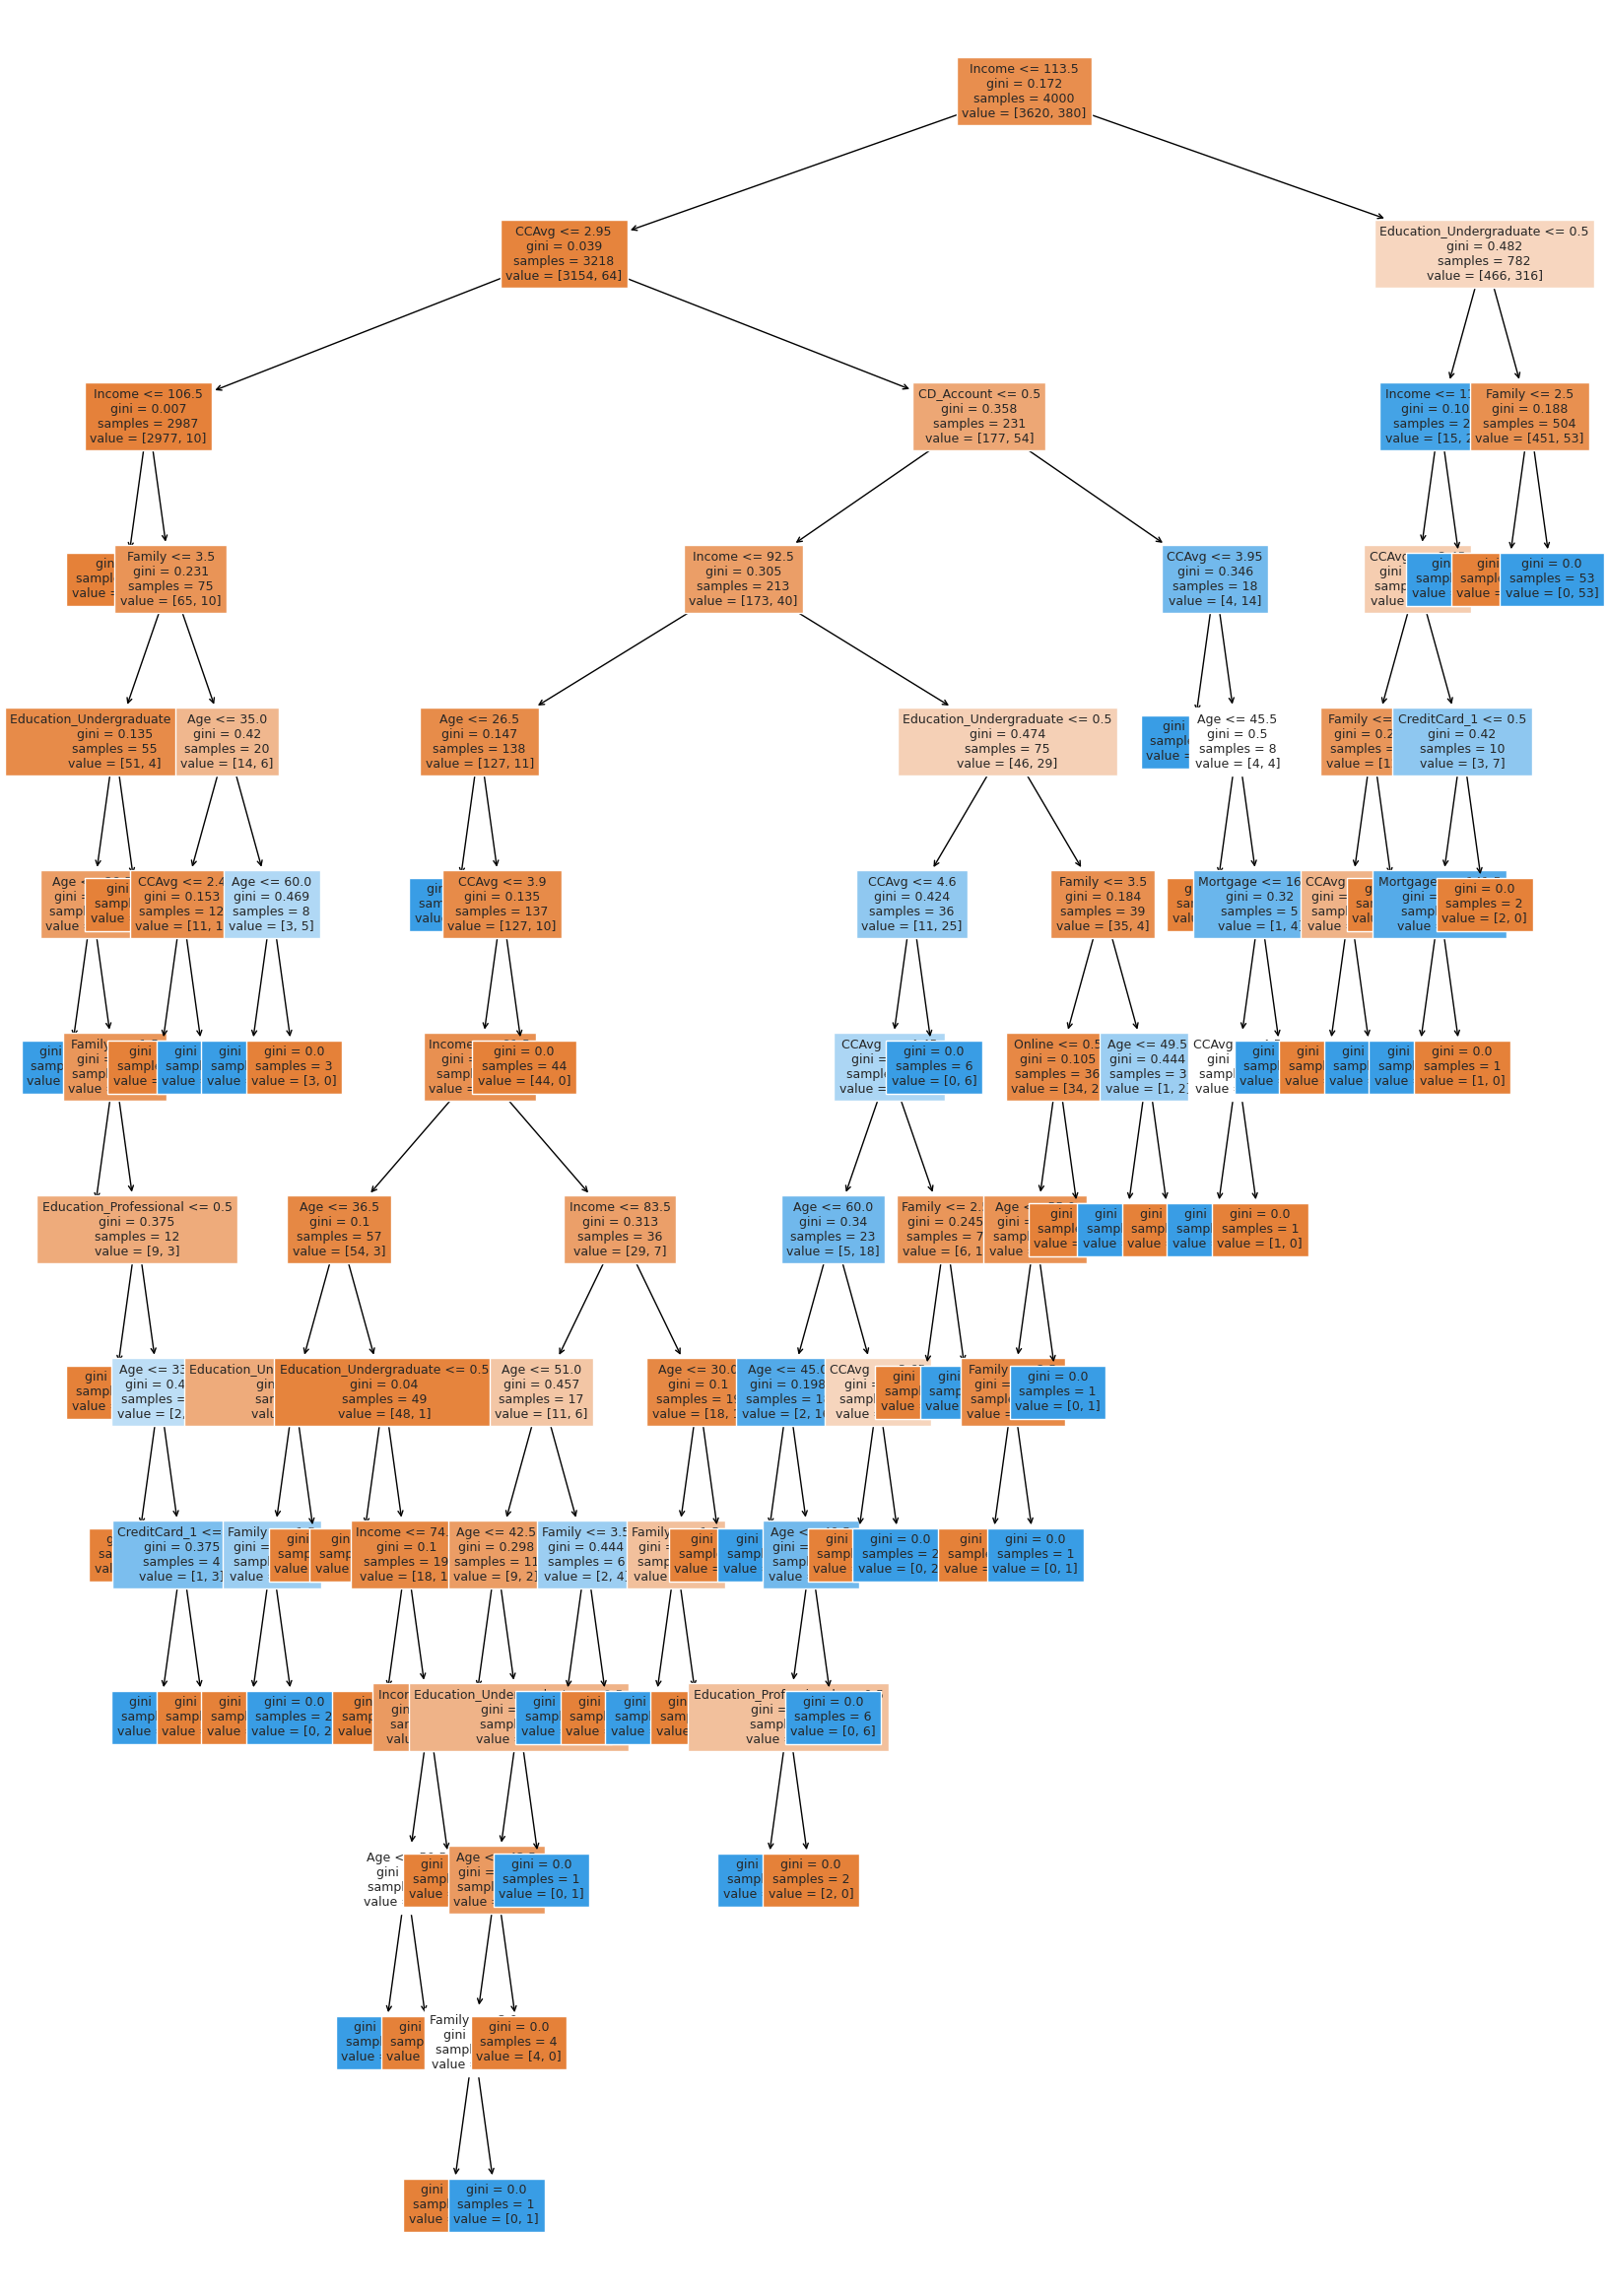

In [ ]:
# Plotting the tree for view
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2912.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |   |--- CreditCard_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.392977
Income                   0.316982
Family                   0.159298
CCAvg                    0.062708
Age                      0.036681
CD_Account               0.016799
CreditCard_1             0.005743
Education_Professional   0.004992
Mortgage                 0.003417
Online                   0.000404
Securities_Account       0.000000


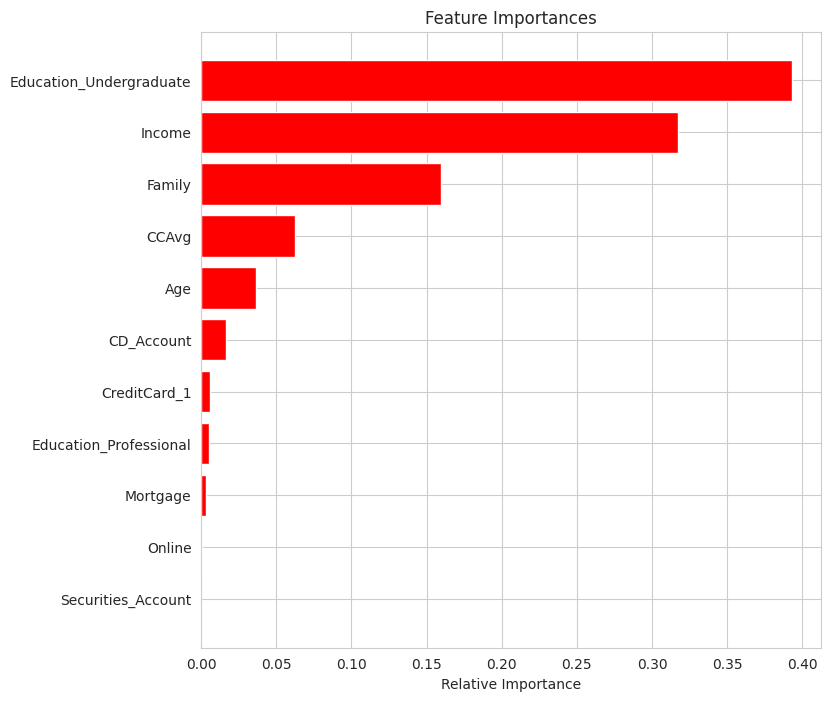

In [ ]:
# Bar Graph of feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on training data

In [ ]:
# Printing of the test results
def confusion_matrix_sklearn(true_labels):
    return confusion_matrix(true_labels, model.predict(X_test))

print(confusion_matrix_sklearn(y_test))

[[892   8]
 [ 11  89]]


In [ ]:
# Model Performance Metrics
def model_performance_classification_sklearn(true_labels, predicted_labels):
    ...
    return performance_metrics

### Model Performance Improvement

#### Pre-Pruning

In [ ]:
# Necessary imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
import numpy as np

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best model on the train data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=7,
                       random_state=1)

**Checking performance on training data**

In [ ]:
# Checking the perfomance of the test results
def confusion_matrix_sklearn(true_labels, predicted_labels):
    return confusion_matrix(true_labels, predicted_labels)

y_train_pred = estimator.predict(X_train)

print(confusion_matrix_sklearn(y_train, y_train_pred))

[[3602   18]
 [  27  353]]


In [ ]:
# Accuraccy Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance_classification_sklearn(true_labels, predicted_labels):
    metrics = {}
    metrics['accuracy'] = accuracy_score(true_labels, predicted_labels)
    metrics['precision'] = precision_score(true_labels, predicted_labels)
    metrics['recall'] = recall_score(true_labels, predicted_labels)
    metrics['f1'] = f1_score(true_labels, predicted_labels)

    return metrics

y_train_pred = estimator.predict(X_train)
decision_tree_tune_perf_train = model_performance_classification_sklearn(y_train, y_train_pred)
decision_tree_tune_perf_train


{'accuracy': 0.98875,
 'precision': 0.9514824797843666,
 'recall': 0.9289473684210526,
 'f1': 0.9400798934753662}

**Visualizing the Decision Tree**

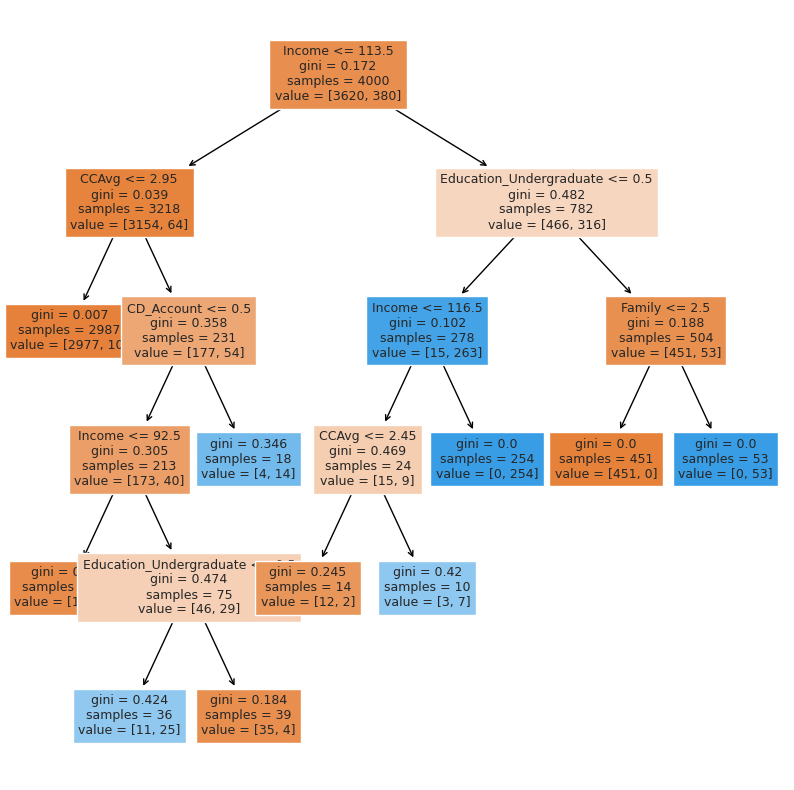

In [ ]:
# Tree Visualization plot
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2977.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [127.00, 11.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- weights: [11.00, 25.00] class: 1
|   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |--- weights: [35.00, 4.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [4.00, 14.00] class: 1
|--- Income >  113.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [12.00, 2.00] class: 0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- weights: [3.00, 7.00] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 254.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- wei

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.435940
Income                   0.346827
Family                   0.155163
CCAvg                    0.043169
CD_Account               0.018901
Age                      0.000000
Mortgage                 0.000000
Securities_Account       0.000000
Online                   0.000000
CreditCard_1             0.000000
Education_Professional   0.000000


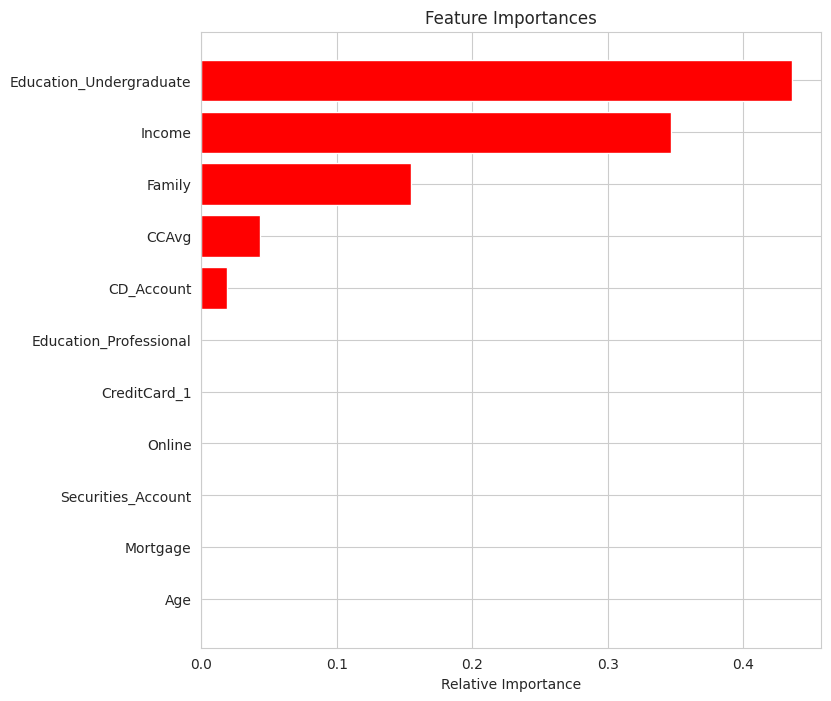

In [ ]:
# Feature Importances Bar Graph
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

In [ ]:
# Test results predict
confusion_matrix_sklearn(y_test, estimator.predict(X_test))


array([[895,   5],
       [ 12,  88]])

In [ ]:
# Accuracy test
y_pred_test = estimator.predict(X_test)
decision_tree_tune_perf_test = model_performance_classification_sklearn(y_test, y_pred_test)
decision_tree_tune_perf_test

{'accuracy': 0.983,
 'precision': 0.946236559139785,
 'recall': 0.88,
 'f1': 0.911917098445596}

#### Cost-Complexity Pruning

In [ ]:
# Complexity Pruning the tree
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# Print of the DataFrame
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000122    0.000490
2     0.000200    0.000890
3     0.000205    0.001708
4     0.000237    0.002182
5     0.000296    0.003071
6     0.000300    0.003671
7     0.000310    0.004602
8     0.000314    0.005856
9     0.000315    0.006801
10    0.000333    0.007134
11    0.000384    0.009056
12    0.000427    0.009483
13    0.000429    0.009911
14    0.000429    0.010769
15    0.000438    0.011206
16    0.000458    0.011664
17    0.000517    0.012181
18    0.000534    0.013249
19    0.000578    0.014405
20    0.000613    0.015017
21    0.000668    0.017688
22    0.000717    0.019122
23    0.000905    0.020027
24    0.002784    0.025595
25    0.002889    0.028484
26    0.004283    0.032767
27    0.005692    0.038459
28    0.023713    0.062172
29    0.054889    0.171950

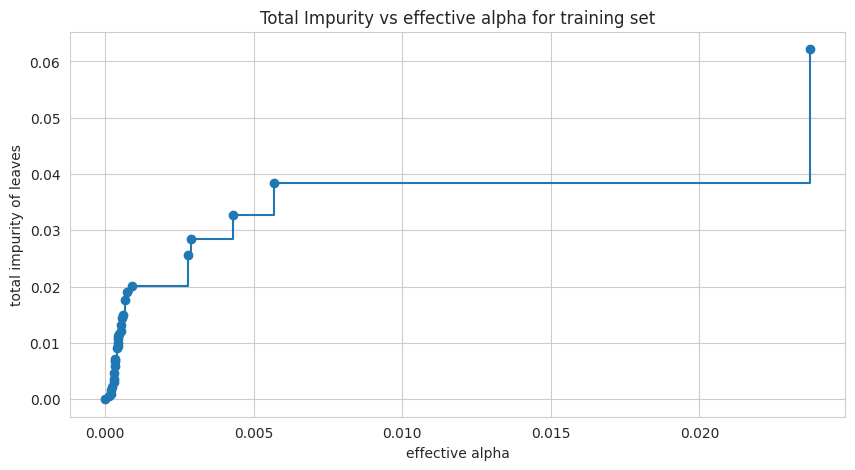

In [ ]:
# PLot of Total Impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
# Number of nodes in the last tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Fit the decision tree on the training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.054888901372465056


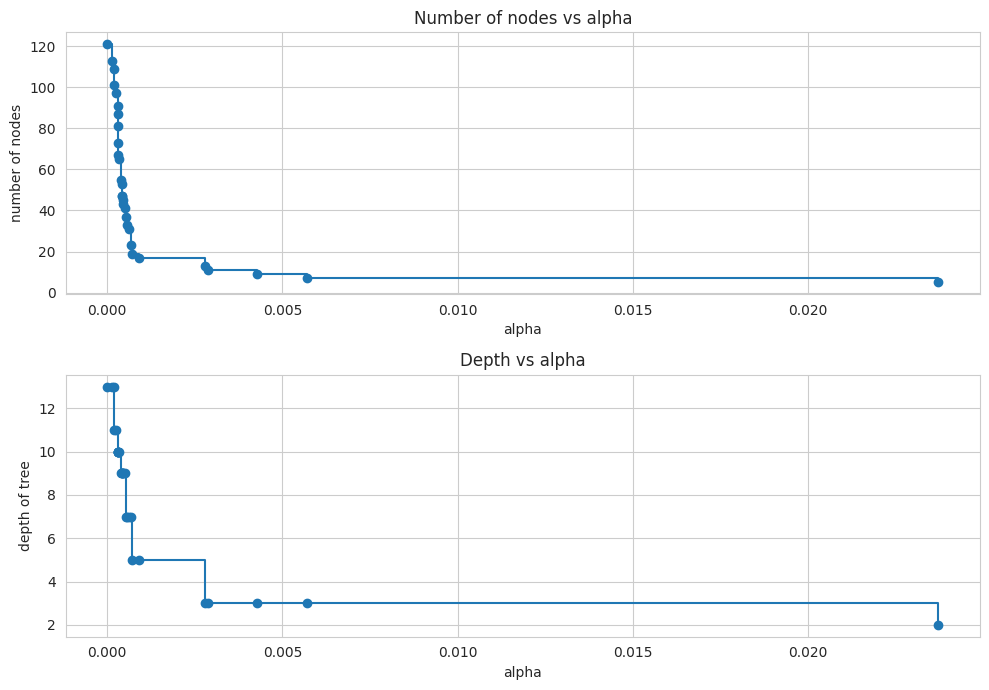

In [ ]:
# Subplot of Number of nodes vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
# Recall train and test
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

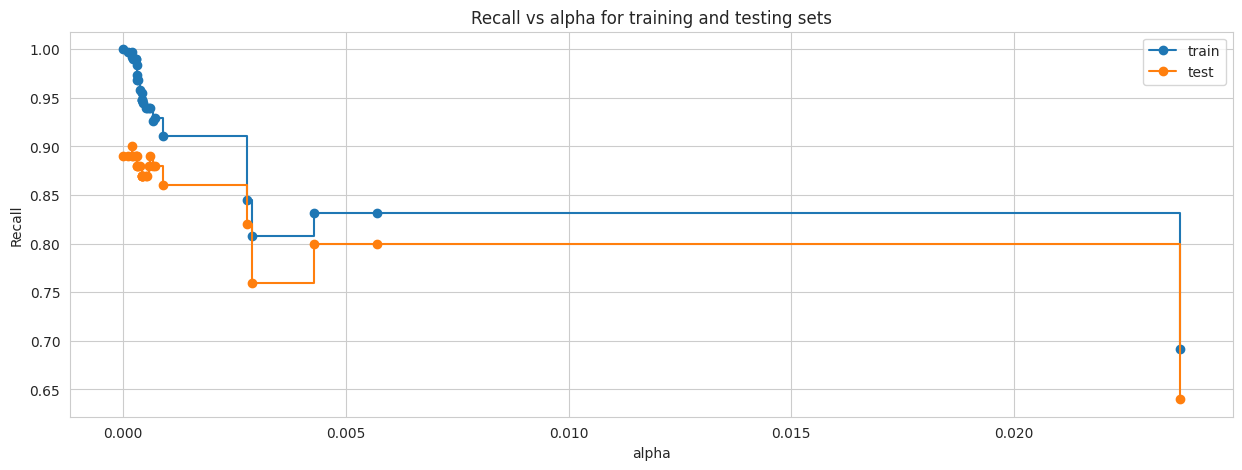

In [ ]:
# Graph AX plot of Recall vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Recall test on best model
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00019999999999999996, random_state=1)


#### Post-Purning

In [ ]:
# Decision Tree classifier
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[-1], class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.023713293650793645,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking performance on training data**

In [ ]:
# Results of esimator
confusion_matrix_sklearn(y_train, estimator_2.predict(X_train))

array([[3508,  112],
       [  27,  353]])

In [ ]:
# Accuracy Scores
y_train_pred_post = estimator_2.predict(X_train)
decision_tree_tune_post_train = model_performance_classification_sklearn(y_train, y_train_pred_post)
decision_tree_tune_post_train

{'accuracy': 0.96525,
 'precision': 0.7591397849462366,
 'recall': 0.9289473684210526,
 'f1': 0.8355029585798817}

**Visualizing the Decision Tree**

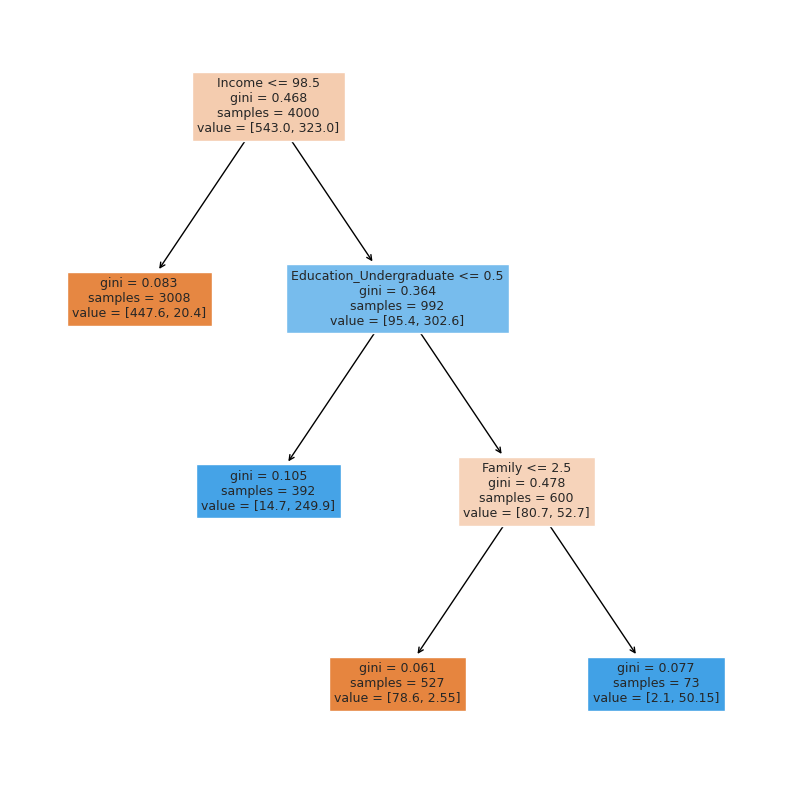

In [ ]:
# Tree visual for decision
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [447.60, 20.40] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [14.70, 249.90] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [78.60, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.10, 50.15] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.671032
Family                   0.166387
Education_Undergraduate  0.162581
Age                      0.000000
CCAvg                    0.000000
Mortgage                 0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
CreditCard_1             0.000000
Education_Professional   0.000000


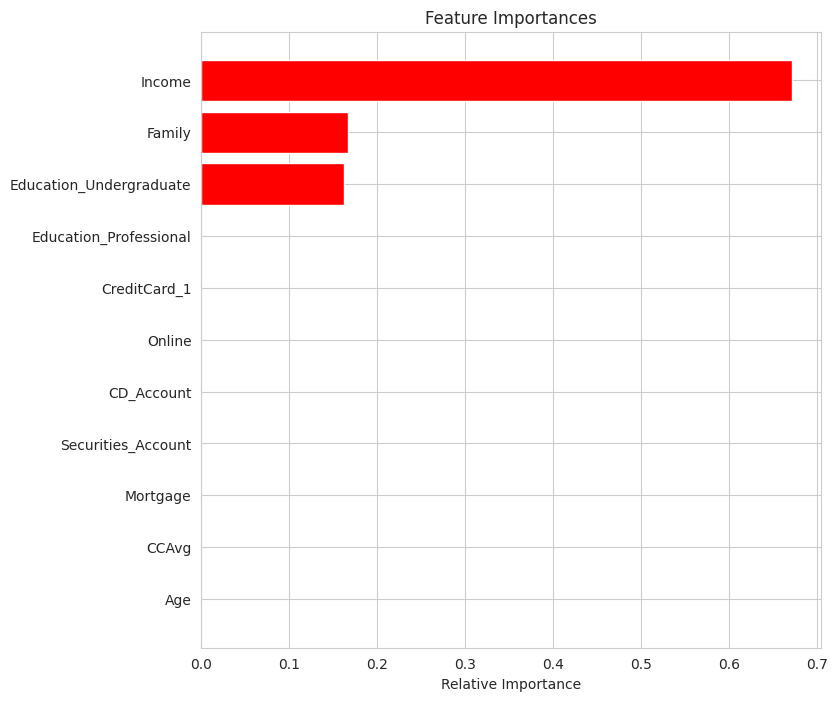

In [ ]:
# Feature importance Bar Graph
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

In [ ]:
# compute the confusion matrix for the predictions of a given estimator (or model)
confusion_matrix_sklearn(y_test, estimator_2.predict(X_test))

array([[873,  27],
       [ 14,  86]])

In [ ]:
# Predictions for test data using the trained decision tree model
y_pred_test_post = estimator_2.predict(X_test)

# Evaluate model's performance metrics by comparing predictions to actual test labels
decision_tree_tune_post_test = model_performance_classification_sklearn(y_test, y_pred_test_post)

## Model Performance Comparison

In [ ]:
# Create a DataFrame for each model's performance metrics and transpose them
df_decision_tree_perf_train = pd.DataFrame(decision_tree_perf_train, index=["Decision Tree sklearn"]).T
df_decision_tree_tune_perf_train = pd.DataFrame(decision_tree_tune_perf_train, index=["Decision Tree (Pre-Pruning)"]).T
df_decision_tree_tune_post_train = pd.DataFrame(decision_tree_tune_post_train, index=["Decision Tree (Post-Pruning)"]).T

# Concatenate the DataFrames for a side-by-side comparison
models_comparison_df = pd.concat(
    [df_decision_tree_perf_train, df_decision_tree_tune_perf_train, df_decision_tree_tune_post_train], axis=1
)

models_comparison_df


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     NaN                          NaN   
Recall                       NaN                          NaN   
Precision                    NaN                          NaN   
F1                           NaN                          NaN   
accuracy                     NaN                     0.988750   
precision                    NaN                     0.951482   
recall                       NaN                     0.928947   
f1                           NaN                     0.940080   

           Decision Tree (Post-Pruning)  
Accuracy                            NaN  
Recall                              NaN  
Precision                           NaN  
F1                                  NaN  
accuracy                       0.965250  
precision                      0.759140  
recall                         0.928947  
f1                             0.835503

In [ ]:
# Compute the performance metrics on the test set for each model
decision_tree_perf_test = model_performance_classification_sklearn(y_test, estimator.predict(X_test))
decision_tree_tune_perf_test = model_performance_classification_sklearn(y_test, estimator_2.predict(X_test))
# ... add any other models you have ...

# Create DataFrames for each set of metrics
df_decision_tree_perf_test = pd.DataFrame(decision_tree_perf_test, index=["Decision Tree sklearn"]).T
df_decision_tree_tune_perf_test = pd.DataFrame(decision_tree_tune_perf_test, index=["Decision Tree (Pre-Pruning)"]).T
# ... add any other models you have ...

# Concatenate the DataFrames for a side-by-side comparison
models_test_comparison_df = pd.concat(
    [df_decision_tree_perf_test, df_decision_tree_tune_perf_test],  # ... add any other models you have ...
    axis=1
)

models_test_comparison_df


Decision Tree sklearn  Decision Tree (Pre-Pruning)
accuracy                0.983000                     0.959000
precision               0.946237                     0.761062
recall                  0.880000                     0.860000
f1                      0.911917                     0.807512

Here's a breakdown of the metrics:

Decision Tree (Pre-Pruning):

Accuracy: 0.983
Precision: 0.946237
Recall: 0.88
F1 Score: 0.911917
Decision Tree (Post-Pruning):

Accuracy: 0.959
Precision: 0.761062
Recall: 0.86
F1 Score: 0.807512
Here's what these metrics mean:

Accuracy: This metric measures the overall correctness of the model's predictions. The decision tree with pre-pruning has a higher accuracy (0.983) compared to post-pruning (0.959), which indicates that the pre-pruned tree is making more correct predictions on the test data.

Precision: Precision is a measure of how many of the positive predictions made by the model are actually correct. The decision tree with pre-pruning has higher precision (0.946237) compared to post-pruning (0.761062). This means that the pre-pruned tree is better at avoiding false positives.

Recall: Recall measures how many of the actual positive cases were correctly predicted by the model. The decision tree with pre-pruning has a slightly lower recall (0.88) compared to post-pruning (0.86), indicating that the pre-pruned tree may miss a few more positive cases.

F1 Score: The F1 score is the harmonic mean of precision and recall and provides a balance between the two. The decision tree with pre-pruning has a higher F1 score (0.911917) compared to post-pruning (0.807512), indicating a better balance between precision and recall.

In summary, the decision tree with pre-pruning has higher accuracy and precision but slightly lower recall compared to the post-pruned tree. The choice between pre-pruning and post-pruning depends on the specific problem and the trade-offs you are willing to make between different performance metrics. Pre-pruning is often used to simplify the tree and avoid overfitting, which can be beneficial in cases where interpretability and generalization are important.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___


To provide recommendations to a bank that is trying to get online customers to apply for a personal loan based on the test results of a Decision Tree model, you should consider the following actions:

Leverage the Pre-Pruned Decision Tree Model: Given that the pre-pruned Decision Tree model has shown strong overall performance with high accuracy and precision, consider using this model for making predictions and targeting potential loan customers.

Identify High-Probability Customers: Use the pre-pruned Decision Tree model to identify customers who are most likely to be interested in a personal loan. These would be customers who fall into the "loan-worthy" segments based on the model's predictions.

Tailored Marketing Campaigns: Customize marketing campaigns to target the identified high-probability customers. Craft personalized messages that highlight the benefits of a personal loan and how it can meet their specific financial needs.

Offer Incentives: Consider offering incentives or promotional offers to encourage customers to apply for a personal loan. This could include special interest rates, reduced fees, or cashback rewards.

Improve Customer Engagement: Enhance the bank's online presence and user experience. Ensure that the bank's website and online application process are user-friendly, intuitive, and secure. A seamless online experience can encourage more customers to apply.

Provide Clear Information: Make sure that all necessary information about personal loans, including terms and conditions, interest rates, repayment options, and eligibility criteria, is readily available on the bank's website. Transparency helps build trust with customers.

Online Chat and Support: Offer online chat support or a dedicated customer support hotline to assist customers who have questions or need assistance with the loan application process.

Follow-Up and Retargeting: Implement a follow-up strategy for customers who show interest but do not complete the application. Use retargeting techniques to remind them about the loan offer.

Data Collection and Analysis: Continuously collect and analyze customer data to refine and improve the targeting and messaging strategies. Use customer feedback to make necessary adjustments.

Compliance and Data Security: Ensure that the bank complies with all regulatory requirements regarding personal loan marketing and data security. Customers need to trust that their information is safe.

A/B Testing: Consider conducting A/B testing on different marketing strategies, messages, and incentives to determine which ones are most effective in converting leads into loan applicants.

Monitor and Adapt: Continuously monitor the effectiveness of your marketing campaigns and adjust your strategies as needed. Keep an eye on changes in customer behavior and market trends.

Remember that while the Decision Tree model can be a valuable tool for identifying potential customers, successful marketing also involves a combination of data-driven strategies, effective communication, and a customer-centric approach. By implementing these recommendations and staying agile in your marketing efforts, the bank can increase its chances of attracting online customers to apply for personal loans.